In [1]:
import ensemble
import os
import dataset_generator as dataset
from ocr_ensamble_builder import ocr_cnn_ensamble_builder
from util import Util
from preprocessing import preprocess_data
import time
import numpy as np

Using TensorFlow backend.


In [2]:
# Generating the nets for each character in dataset
u = Util()

directories = []

for letter in dataset.ALPHABET_ALL:
    directories.append(os.path.join("checkpoints", letter))

for mydir in directories:
    if not os.path.exists(mydir):
        os.makedirs(mydir)

In [3]:
def analyze_all_letters(paths, pos_neg_ratio=1, clamp_end_path=0):

    for index, my_dir in enumerate(paths):
        
        # Build the ensemble
        my_ensemble = ocr_cnn_ensamble_builder(2, 800, path=my_dir)

        # Get the train and test data
        if(clamp_end_path != 0):
            curr_char = paths[index].split('\\')[1][0:-clamp_end_path]
        else:
            curr_char = paths[index].split('\\')[1]

        (X_train, y_train, X_test, y_test) = dataset.generate_positive_and_negative_labeled(curr_char, pos_neg_ratio=pos_neg_ratio)

        print("\n---- START ANALISYS FOR CHAR %s ----" %(curr_char.upper()))

        ctime=time.time()

        print("\nStart TRAINING for char %s" %(curr_char.upper()))
        
        # Train the model for the letter if it is nedeed, otherwise compile the existent model
        if index > -1:
            # Train the data
            my_ensemble.fit(X_train, y_train, X_test, y_test, verbose=0)

            print("\nThe TRAINING lasted %.2f seconds" %(time.time()-ctime))  

        else:
            # Uncomment if you already trained the model, and comment the instruction above
            my_ensemble.compile_model()

        # Plot the history of the first ensemble's net
        my_ensemble._models[0].plot_history()

        # Evaluate the model
        score = my_ensemble.evaluate(X_test, y_test, verbose=1)

        predicted_classes = my_ensemble.predict(X_test)

        # Check which items we got right / wrong
        correct_indices = np.nonzero(predicted_classes == y_test)[0]
        incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

        X_test_prep, y_test_prep, _ = preprocess_data(X_test, y_test, 2, img_rows=34, img_cols=56, verbose=0)

        # Plot the examples of correct predictions
        print("\nExample of correct predictions for char: %s" %(curr_char.upper()))
        
        u.plot_images(X_test_prep[correct_indices[:9]], y_test_prep[correct_indices[:9]], 
                  predicted_classes[correct_indices[:9]], img_shape=(56,34))

        # Plot the examples of incorrect predictions
        print("\nExample of incorrect predictions for char: %s" %(curr_char.upper()))

        u.plot_images(X_test_prep[incorrect_indices[:9]], y_test_prep[incorrect_indices[:9]], 
                  predicted_classes[incorrect_indices[:9]], img_shape=(56,34))

        #Plot the confusion matrix
        u.plot_confusion_matrix(y_test, 2, predicted_classes)

        print("\n---- END ANALISYS FOR CHAR %s ----\n" %(curr_char.upper()))
    
    
    
    

Trovati 1638 esempi positivi per il carattere A .
Campioni di training: 1404 	Campioni di test: 234
Richiesti 1638 esempi negativi: trovati 1638 generici.
Numero totale di campioni di training: 2808
Numero totale di campioni di test: 468

---- START ANALISYS FOR CHAR A ----

Start TRAINING for char A
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 11 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 36 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 35 epoch(s)
Done.



The TRAINING lasted 1910.72 seconds
History: 


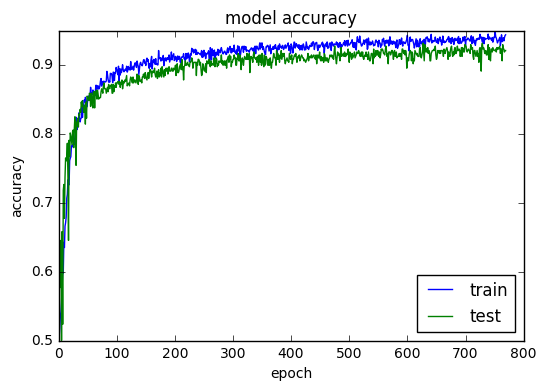

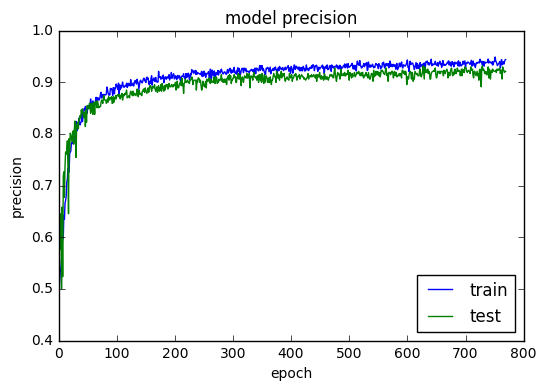

Continuation of training with no pre-processing:


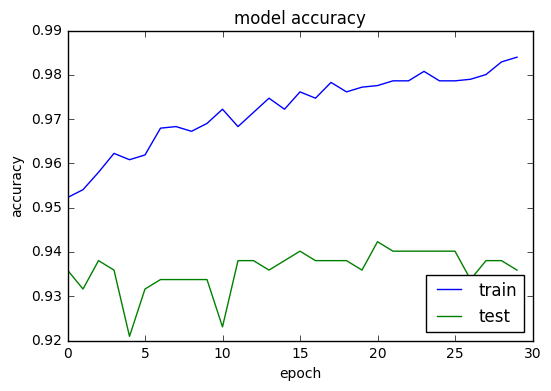

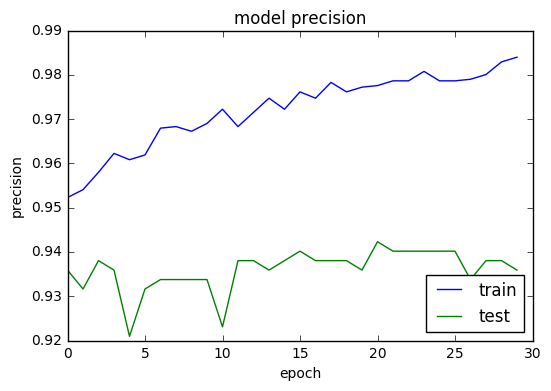

X shape: (468, 34, 56, 1)
468 samples
Evaluating ensemble
468/468 [==============================] - 0s     
Test accuracy: 94.2307691798 %
Test error: 5.76923082017 %
448/468 [===========================>..] - ETA: 0s
Example of correct predictions for char: A


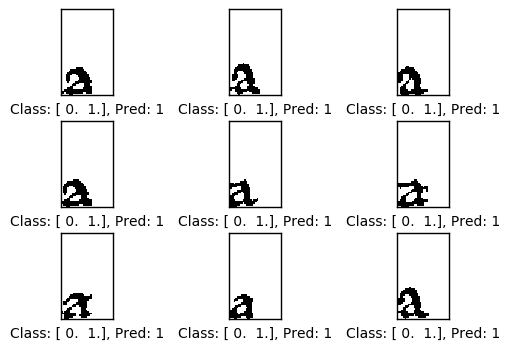


Example of incorrect predictions for char: A


[[215  19]
 [  8 226]]



---- END ANALISYS FOR CHAR A ----

Trovati 655 esempi positivi per il carattere C .
Campioni di training: 561 	Campioni di test: 94
Richiesti 655 esempi negativi: trovati 655 generici.
Numero totale di campioni di training: 1122
Numero totale di campioni di test: 188

---- START ANALISYS FOR CHAR C ----

Start TRAINING for char C
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 13 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 33 epoch(s)
Done.



The TRAINING lasted 857.81 seconds
History: 


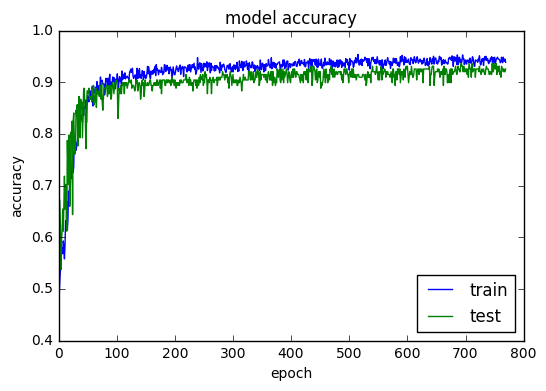

Continuation of training with no pre-processing:


X shape: (188, 34, 56, 1)
188 samples
Evaluating ensemble
188/188 [==============================] - 0s     
Test accuracy: 92.5531919966 %
Test error: 7.44680889109 %
160/188 [========================>.....] - ETA: 0s
Example of correct predictions for char: C


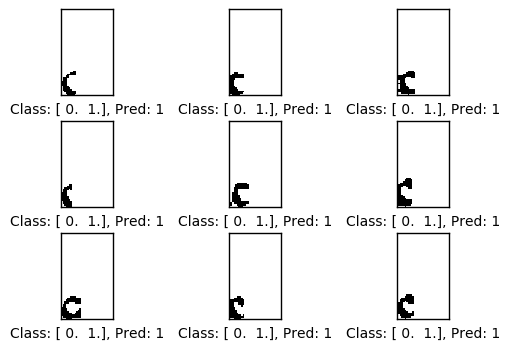


Example of incorrect predictions for char: C


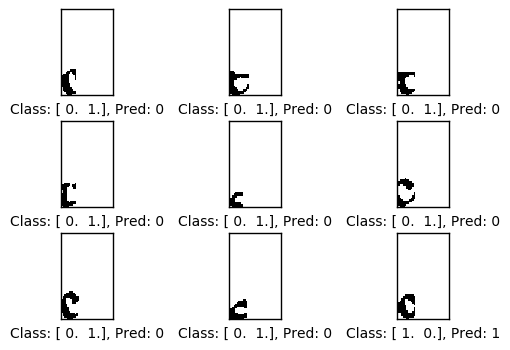

[[88  6]
 [ 8 86]]



---- END ANALISYS FOR CHAR C ----

Trovati 406 esempi positivi per il carattere D_MEDIANA .
Campioni di training: 348 	Campioni di test: 58
Richiesti 406 esempi negativi: trovati 406 generici.
Numero totale di campioni di training: 696
Numero totale di campioni di test: 116

---- START ANALISYS FOR CHAR D_MEDIANA ----

Start TRAINING for char D_MEDIANA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 46 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 46 epoch(s)
Done.



The TRAINING lasted 534.98 seconds
History: 


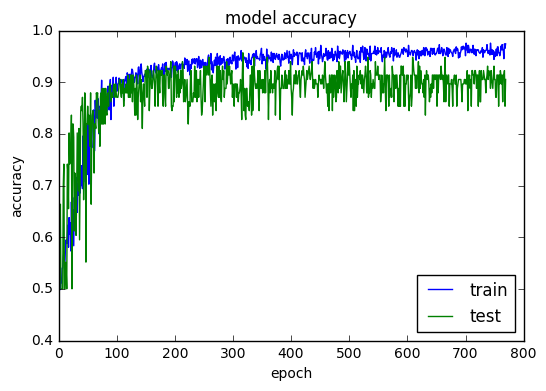

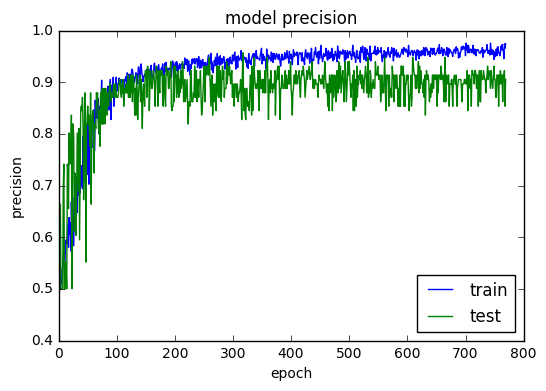

Continuation of training with no pre-processing:


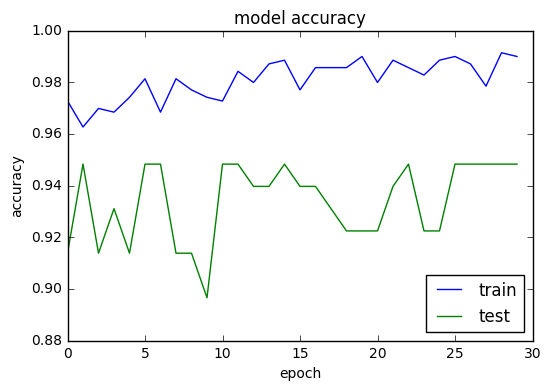

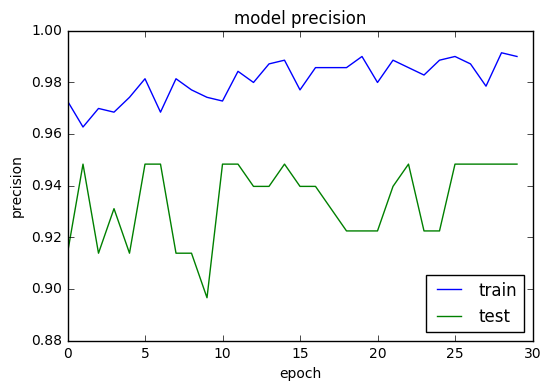

X shape: (116, 34, 56, 1)
116 samples
Evaluating ensemble
116/116 [==============================] - 0s     
Test accuracy: 96.5517239324 %
Test error: 3.4482760676 %
 96/116 [=======================>......] - ETA: 0s
Example of correct predictions for char: D_MEDIANA


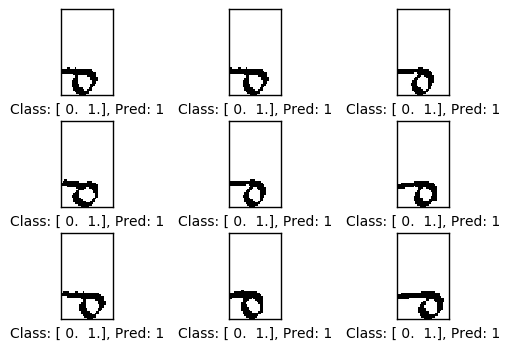


Example of incorrect predictions for char: D_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[54  4]
 [ 0 58]]


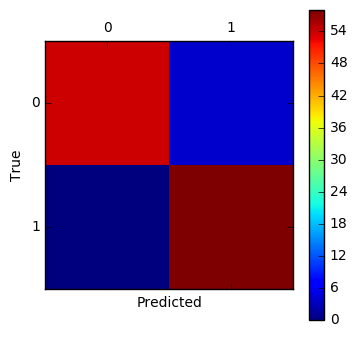


---- END ANALISYS FOR CHAR D_MEDIANA ----

Trovati 2827 esempi positivi per il carattere E .
Campioni di training: 2423 	Campioni di test: 404
Richiesti 2827 esempi negativi: trovati 2827 generici.
Numero totale di campioni di training: 4846
Numero totale di campioni di test: 808

---- START ANALISYS FOR CHAR E ----

Start TRAINING for char E
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 46 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 48 epoch(s)
Done.



The TRAINING lasted 3406.13 seconds
History: 


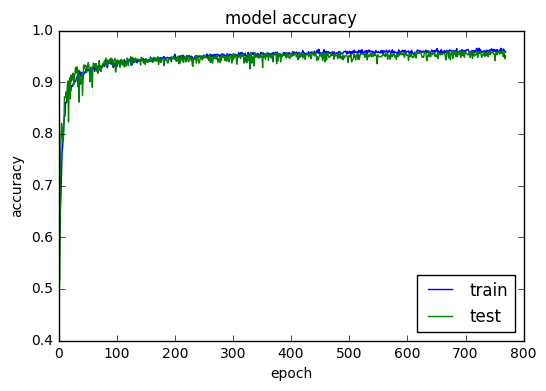

Continuation of training with no pre-processing:


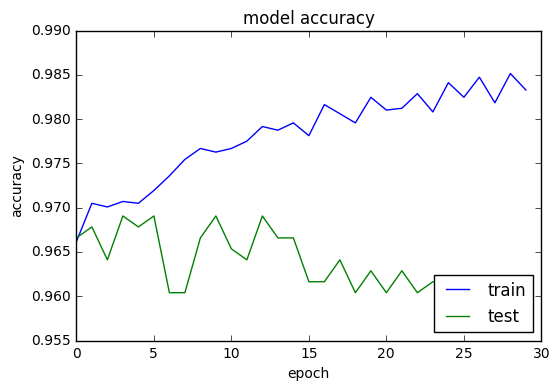

X shape: (808, 34, 56, 1)
808 samples
Evaluating ensemble
808/808 [==============================] - 0s     
Test accuracy: 96.6584158416 %
Test error: 3.34158415842 %
800/808 [============================>.] - ETA: 0s
Example of correct predictions for char: E



Example of incorrect predictions for char: E


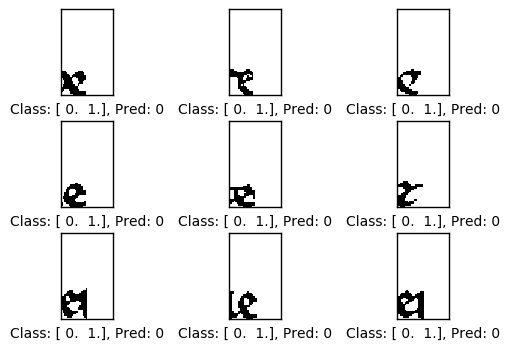

[[388  16]
 [ 11 393]]


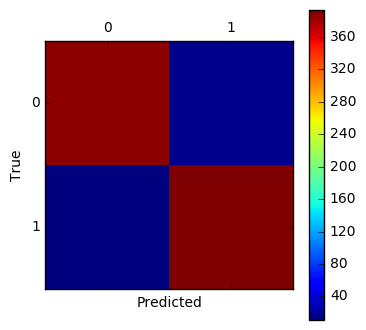


---- END ANALISYS FOR CHAR E ----

Trovati 798 esempi positivi per il carattere I .
Campioni di training: 684 	Campioni di test: 114
Richiesti 798 esempi negativi: trovati 798 generici.
Numero totale di campioni di training: 1368
Numero totale di campioni di test: 228

---- START ANALISYS FOR CHAR I ----

Start TRAINING for char I
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 18 epoch(s)
Done.



The TRAINING lasted 945.53 seconds
History: 


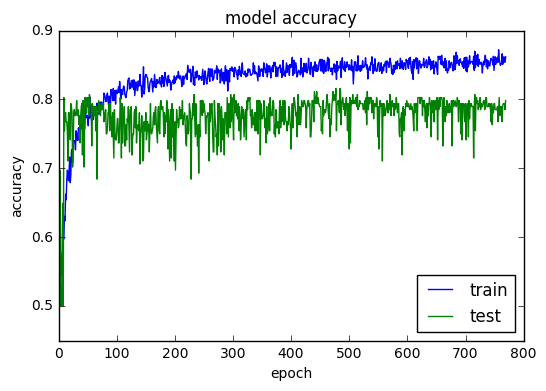

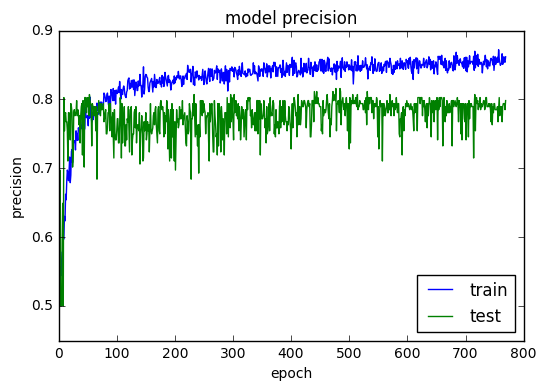

Continuation of training with no pre-processing:


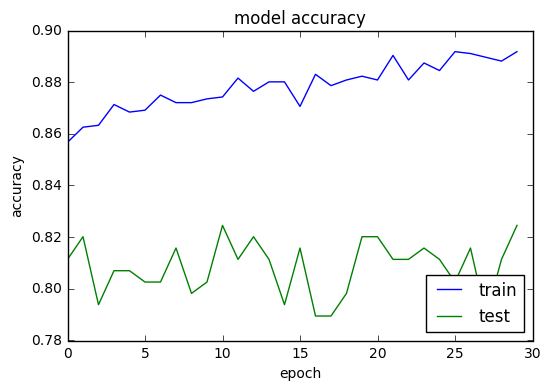

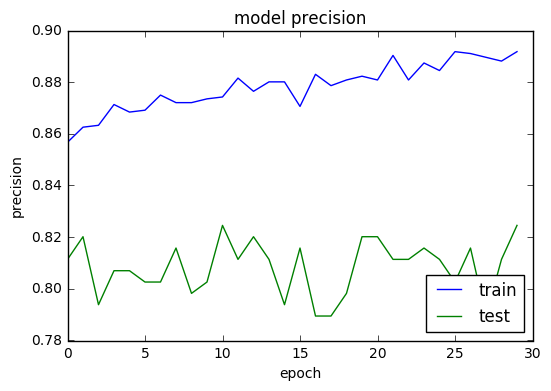

X shape: (228, 34, 56, 1)
228 samples
Evaluating ensemble
224/228 [============================>.] - ETA: 0sTest accuracy: 82.4561403509 %
Test error: 17.5438596491 %
224/228 [============================>.] - ETA: 0s
Example of correct predictions for char: I


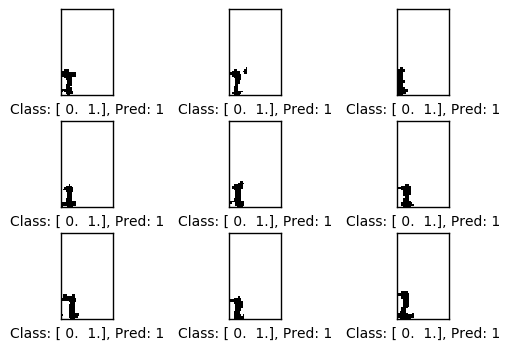


Example of incorrect predictions for char: I


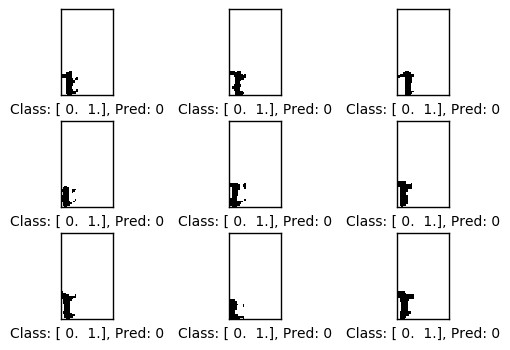

[[ 86  28]
 [ 12 102]]


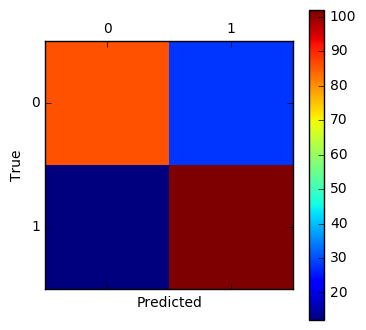


---- END ANALISYS FOR CHAR I ----

Trovati 1514 esempi positivi per il carattere M .
Campioni di training: 1297 	Campioni di test: 217
Richiesti 1514 esempi negativi: trovati 1514 generici.
Numero totale di campioni di training: 2594
Numero totale di campioni di test: 434

---- START ANALISYS FOR CHAR M ----

Start TRAINING for char M
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 28 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 35 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Done.



The TRAINING lasted 1827.41 seconds
History: 


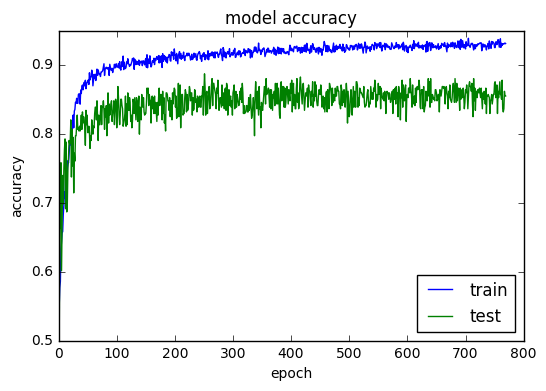

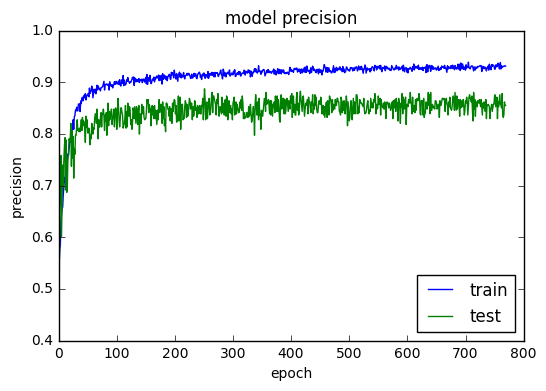

Continuation of training with no pre-processing:


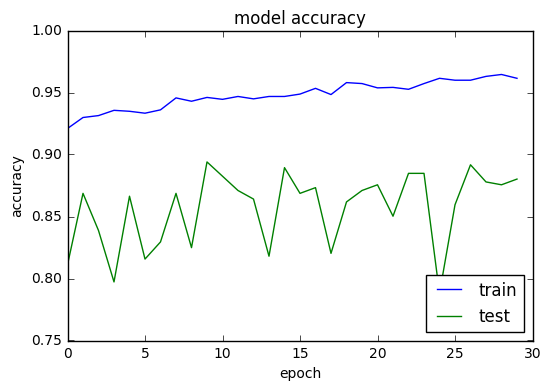

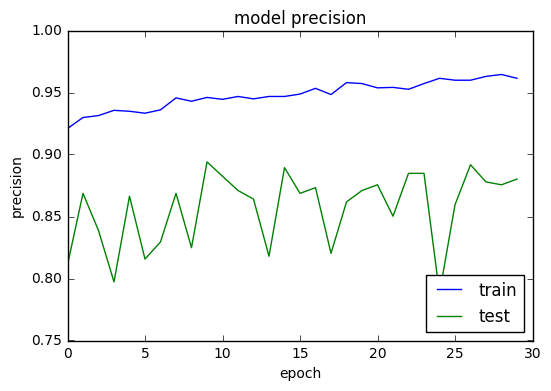

X shape: (434, 34, 56, 1)
434 samples
Evaluating ensemble
434/434 [==============================] - 0s     
Test accuracy: 90.0921657887 %
Test error: 9.90783421125 %
416/434 [===========================>..] - ETA: 0s
Example of correct predictions for char: M


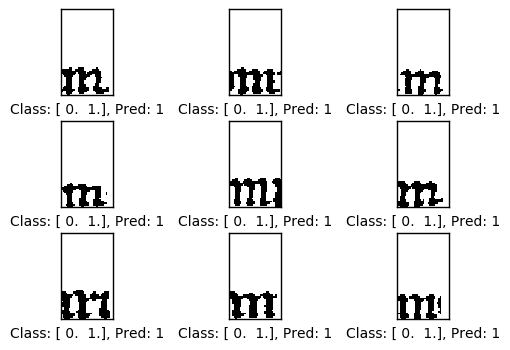


Example of incorrect predictions for char: M


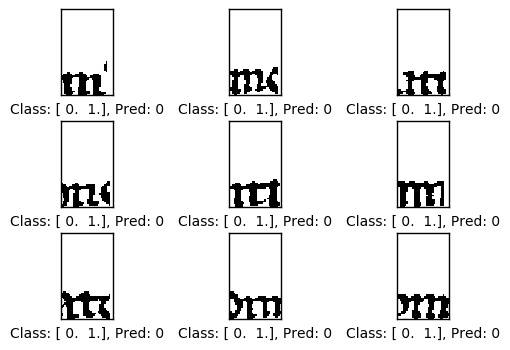

[[188  29]
 [ 14 203]]


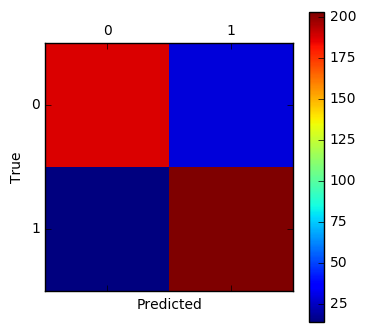


---- END ANALISYS FOR CHAR M ----

Trovati 1950 esempi positivi per il carattere N .
Campioni di training: 1671 	Campioni di test: 279
Richiesti 1950 esempi negativi: trovati 1950 generici.
Numero totale di campioni di training: 3342
Numero totale di campioni di test: 558

---- START ANALISYS FOR CHAR N ----

Start TRAINING for char N
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 38 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 18 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 32 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 39 epoch(s)
Done.



The TRAINING lasted 2445.65 seconds
History: 


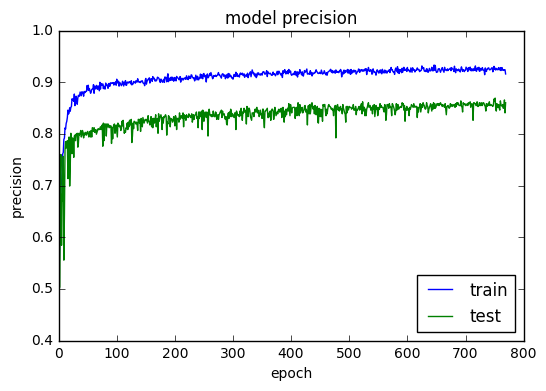

Continuation of training with no pre-processing:


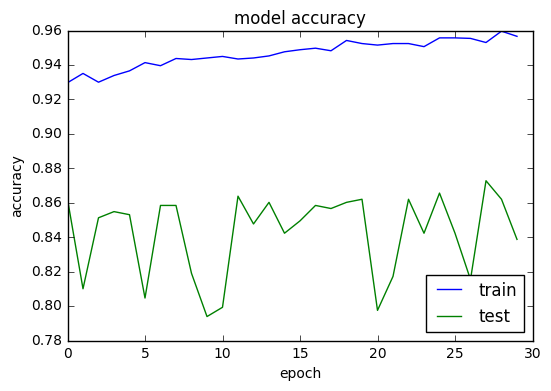

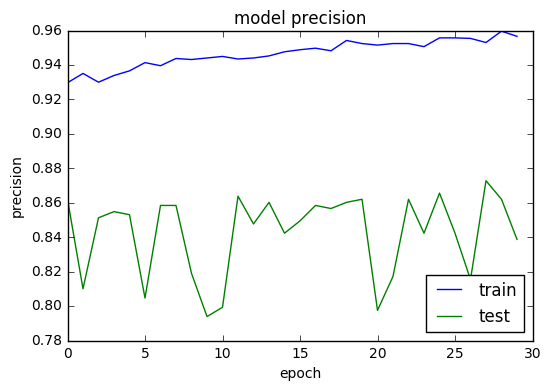

X shape: (558, 34, 56, 1)
558 samples
Evaluating ensemble
544/558 [============================>.] - ETA: 0sTest accuracy: 87.6344087731 %
Test error: 12.3655913765 %
544/558 [============================>.] - ETA: 0s
Example of correct predictions for char: N


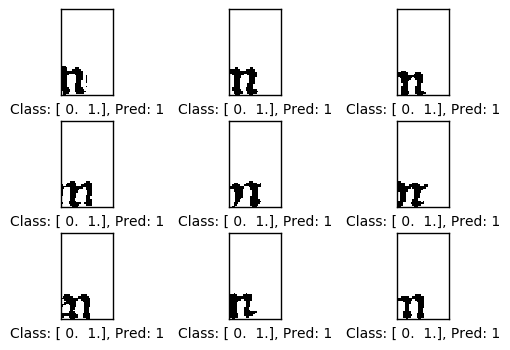


Example of incorrect predictions for char: N


[[238  41]
 [ 28 251]]



---- END ANALISYS FOR CHAR N ----

Trovati 711 esempi positivi per il carattere O .
Campioni di training: 609 	Campioni di test: 102
Richiesti 711 esempi negativi: trovati 711 generici.
Numero totale di campioni di training: 1218
Numero totale di campioni di test: 204

---- START ANALISYS FOR CHAR O ----

Start TRAINING for char O
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 38 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 17 epoch(s)
Done.



The TRAINING lasted 928.91 seconds
History: 


Continuation of training with no pre-processing:


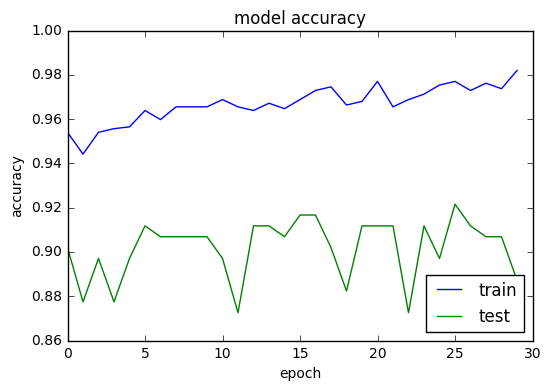

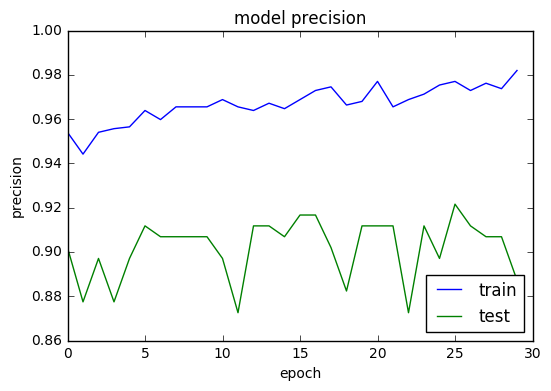

X shape: (204, 34, 56, 1)
204 samples
Evaluating ensemble
192/204 [===========================>..] - ETA: 0sTest accuracy: 92.6470590573 %
Test error: 7.35294129334 %
204/204 [==============================] - 0s     

Example of correct predictions for char: O


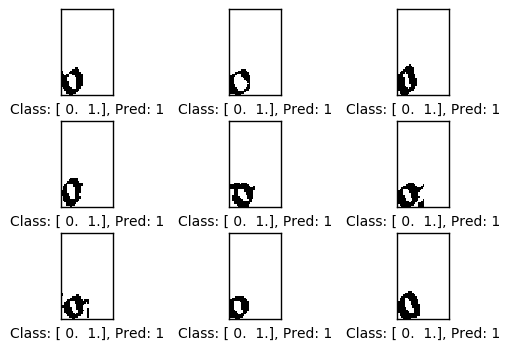


Example of incorrect predictions for char: O


[[94  8]
 [ 7 95]]


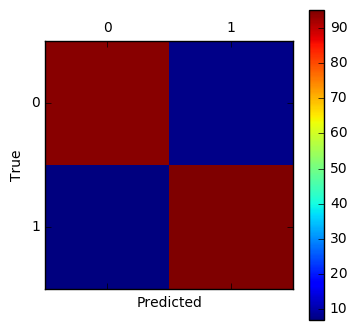


---- END ANALISYS FOR CHAR O ----

Trovati 309 esempi positivi per il carattere R .
Campioni di training: 264 	Campioni di test: 45
Richiesti 309 esempi negativi: trovati 309 generici.
Numero totale di campioni di training: 528
Numero totale di campioni di test: 90

---- START ANALISYS FOR CHAR R ----

Start TRAINING for char R
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 26 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 42 epoch(s)
Done.



The TRAINING lasted 457.17 seconds
History: 


Continuation of training with no pre-processing:


X shape: (90, 34, 56, 1)
90 samples
Evaluating ensemble
64/90 [====================>.........] - ETA: 0sTest accuracy: 93.3333351877 %
Test error: 6.66666653421 %
64/90 [====================>.........] - ETA: 0s
Example of correct predictions for char: R


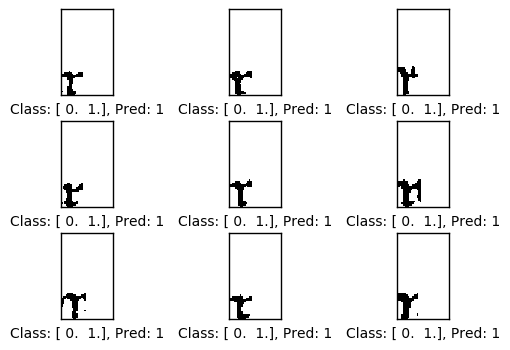


Example of incorrect predictions for char: R

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[41  4]
 [ 2 43]]


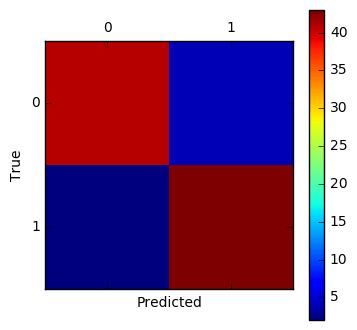


---- END ANALISYS FOR CHAR R ----

Trovati 100 esempi positivi per il carattere S_MEDIANA .
Campioni di training: 85 	Campioni di test: 15
Richiesti 100 esempi negativi: trovati 100 generici.
Numero totale di campioni di training: 170
Numero totale di campioni di test: 30

---- START ANALISYS FOR CHAR S_MEDIANA ----

Start TRAINING for char S_MEDIANA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 26 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 49 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Done.



The TRAINING lasted 168.65 seconds
History: 


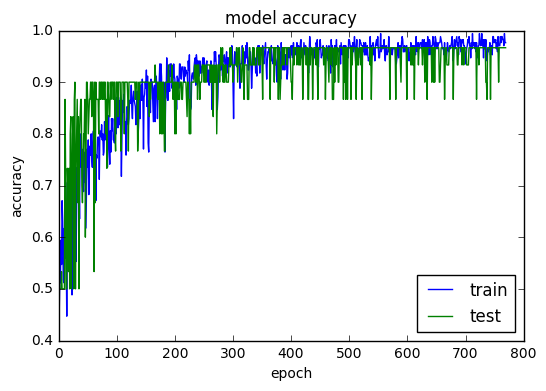

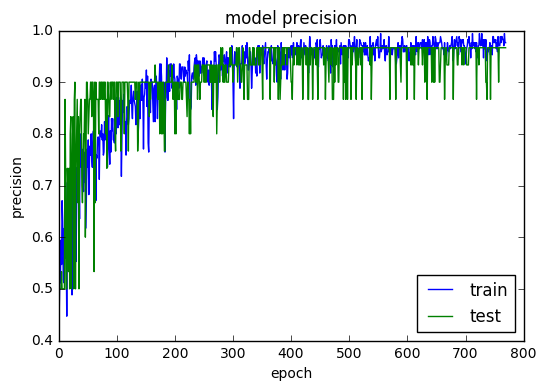

Continuation of training with no pre-processing:


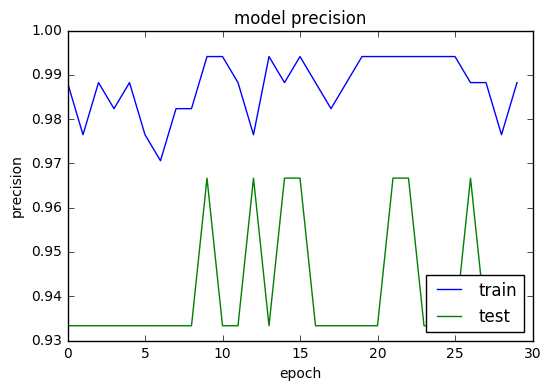

X shape: (30, 34, 56, 1)
30 samples
Evaluating ensemble
30/30 [==============================] - 1s
Test accuracy: 96.6666698456 %
Test error: 3.33333611488 %
30/30 [==============================] - 1s

Example of correct predictions for char: S_MEDIANA



Example of incorrect predictions for char: S_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[14  1]
 [ 0 15]]


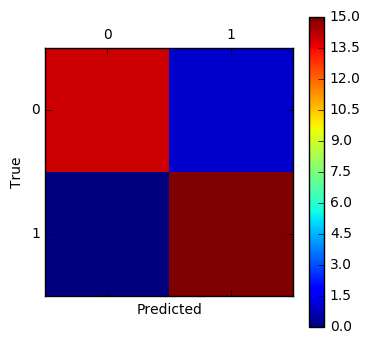


---- END ANALISYS FOR CHAR S_MEDIANA ----

Trovati 1530 esempi positivi per il carattere T .
Campioni di training: 1311 	Campioni di test: 219
Richiesti 1530 esempi negativi: trovati 1530 generici.
Numero totale di campioni di training: 2622
Numero totale di campioni di test: 438

---- START ANALISYS FOR CHAR T ----

Start TRAINING for char T
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Done.



The TRAINING lasted 2032.78 seconds
History: 


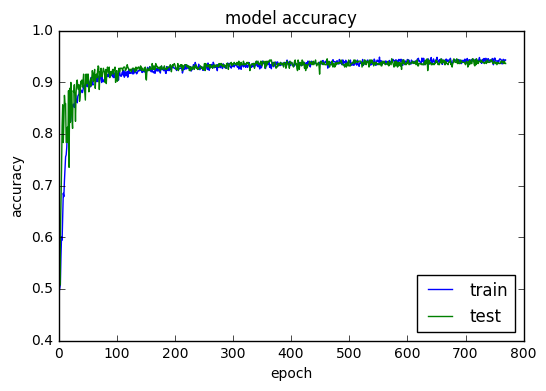

Continuation of training with no pre-processing:


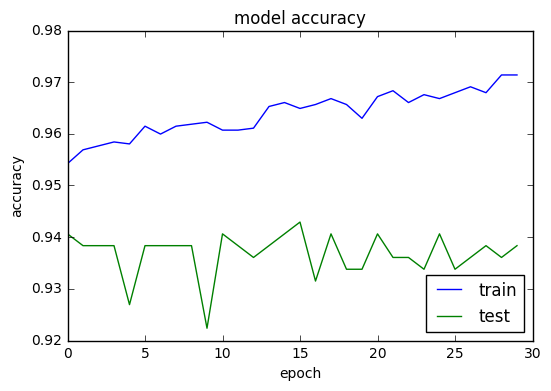

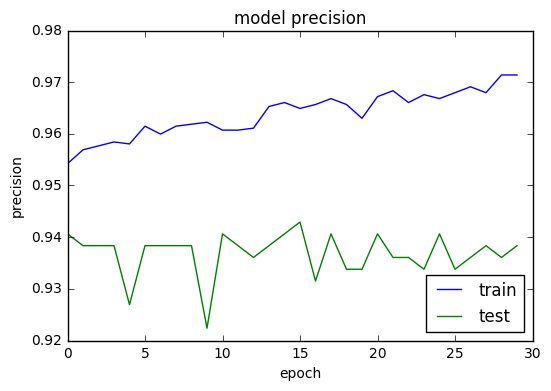

X shape: (438, 34, 56, 1)
438 samples
Evaluating ensemble
438/438 [==============================] - 1s     
Test accuracy: 94.5205479452 %
Test error: 5.47945205479 %
438/438 [==============================] - 1s     

Example of correct predictions for char: T


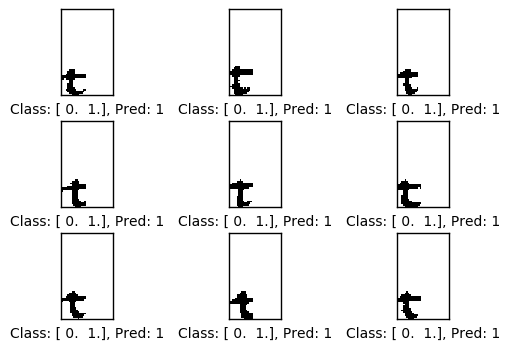


Example of incorrect predictions for char: T


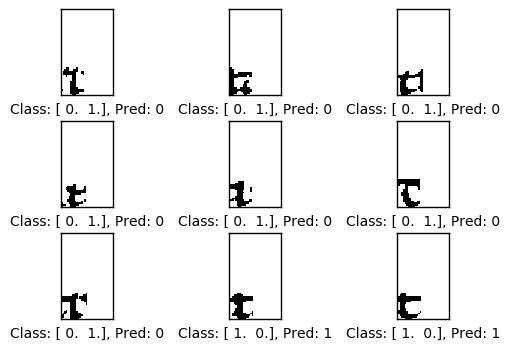

[[202  17]
 [  7 212]]


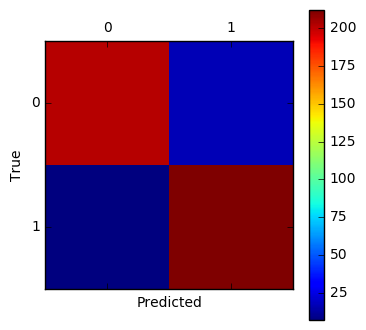


---- END ANALISYS FOR CHAR T ----

Trovati 1146 esempi positivi per il carattere U .
Campioni di training: 982 	Campioni di test: 164
Richiesti 1146 esempi negativi: trovati 1146 generici.
Numero totale di campioni di training: 1964
Numero totale di campioni di test: 328

---- START ANALISYS FOR CHAR U ----

Start TRAINING for char U
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 44 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 15 epoch(s)
Done.



The TRAINING lasted 1555.13 seconds
History: 


Continuation of training with no pre-processing:


X shape: (328, 34, 56, 1)
328 samples
Evaluating ensemble
320/328 [============================>.] - ETA: 0sTest accuracy: 83.8414634146 %
Test error: 16.1585365854 %
320/328 [============================>.] - ETA: 0s
Example of correct predictions for char: U



Example of incorrect predictions for char: U


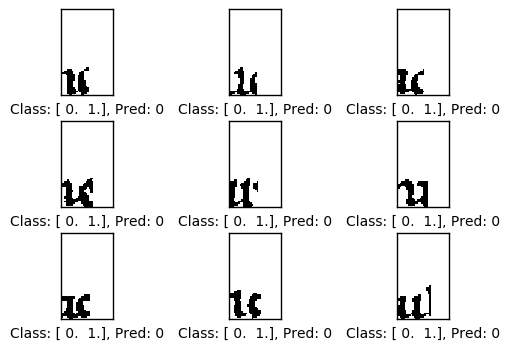

[[127  37]
 [ 16 148]]


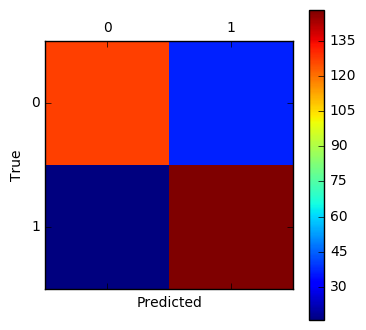


---- END ANALISYS FOR CHAR U ----

Trovati 599 esempi positivi per il carattere D_ALTA .
Campioni di training: 513 	Campioni di test: 86
Richiesti 599 esempi negativi: trovati 599 generici.
Numero totale di campioni di training: 1026
Numero totale di campioni di test: 172

---- START ANALISYS FOR CHAR D_ALTA ----

Start TRAINING for char D_ALTA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 22 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Done.



The TRAINING lasted 1475.00 seconds
History: 


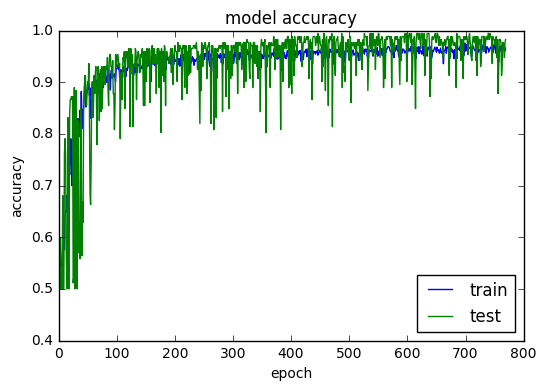

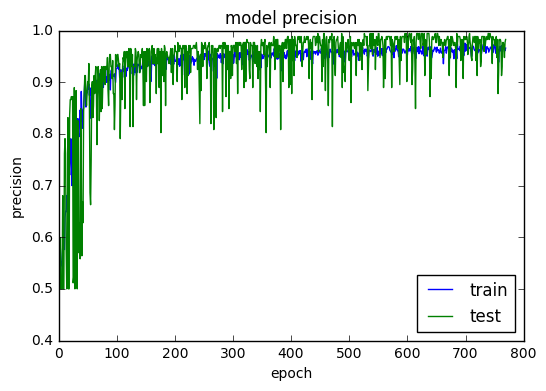

Continuation of training with no pre-processing:


X shape: (172, 34, 56, 1)
172 samples
Evaluating ensemble
172/172 [==============================] - 1s     
Test accuracy: 98.2558139535 %
Test error: 1.74418604651 %
160/172 [==========================>...] - ETA: 0s
Example of correct predictions for char: D_ALTA



Example of incorrect predictions for char: D_ALTA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[85  1]
 [ 2 84]]



---- END ANALISYS FOR CHAR D_ALTA ----

Trovati 796 esempi positivi per il carattere S_ALTA .
Campioni di training: 682 	Campioni di test: 114
Richiesti 796 esempi negativi: trovati 796 generici.
Numero totale di campioni di training: 1364
Numero totale di campioni di test: 228

---- START ANALISYS FOR CHAR S_ALTA ----

Start TRAINING for char S_ALTA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 33 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 48 epoch(s)
Done.



The TRAINING lasted 1031.20 seconds
History: 


Continuation of training with no pre-processing:


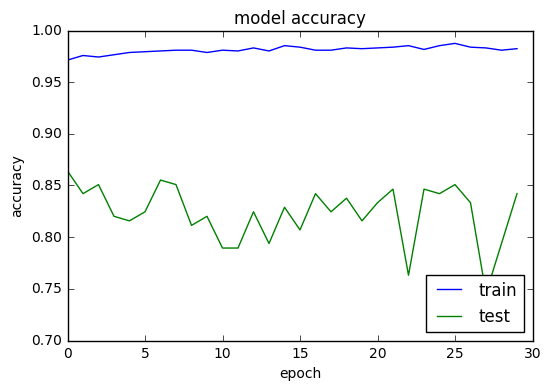

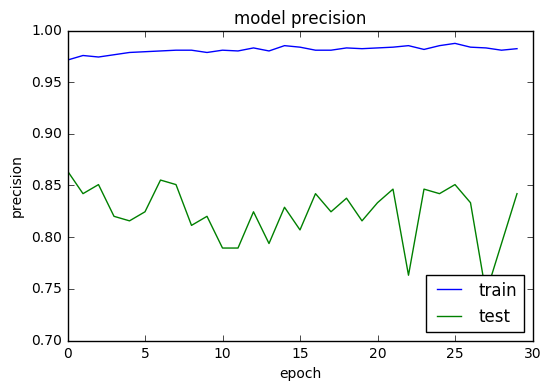

X shape: (228, 34, 56, 1)
228 samples
Evaluating ensemble
224/228 [============================>.] - ETA: 0sTest accuracy: 92.9824561404 %
Test error: 7.01754385965 %
224/228 [============================>.] - ETA: 0s
Example of correct predictions for char: S_ALTA


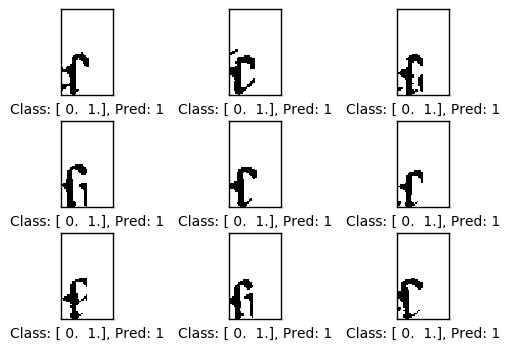


Example of incorrect predictions for char: S_ALTA


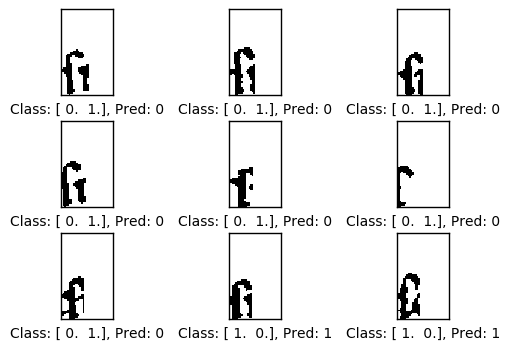

[[105   9]
 [  7 107]]


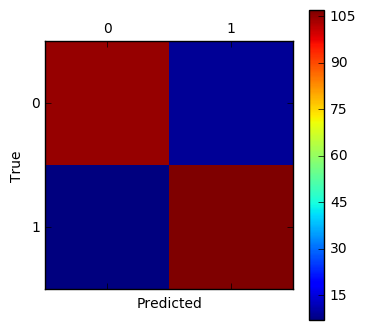


---- END ANALISYS FOR CHAR S_ALTA ----

Trovati 554 esempi positivi per il carattere B .
Campioni di training: 474 	Campioni di test: 80
Richiesti 554 esempi negativi: trovati 554 generici.
Numero totale di campioni di training: 948
Numero totale di campioni di test: 160

---- START ANALISYS FOR CHAR B ----

Start TRAINING for char B
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 19 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 28 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 35 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Done.



The TRAINING lasted 758.00 seconds
History: 


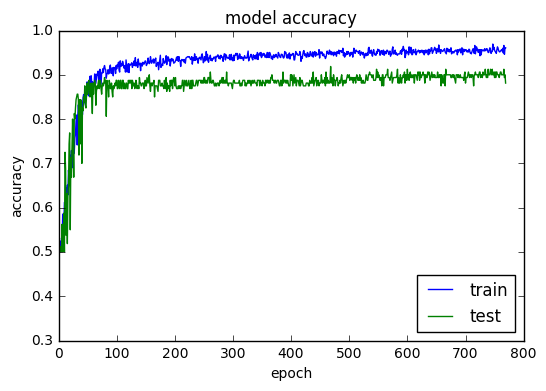

Continuation of training with no pre-processing:


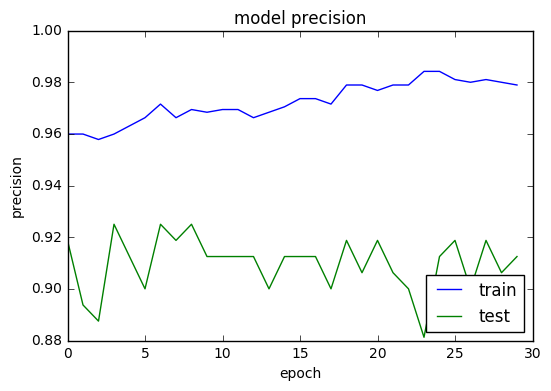

X shape: (160, 34, 56, 1)
160 samples
Evaluating ensemble
160/160 [==============================] - 1s     
Test accuracy: 93.75 %
Test error: 6.25 %
160/160 [==============================] - 1s     

Example of correct predictions for char: B


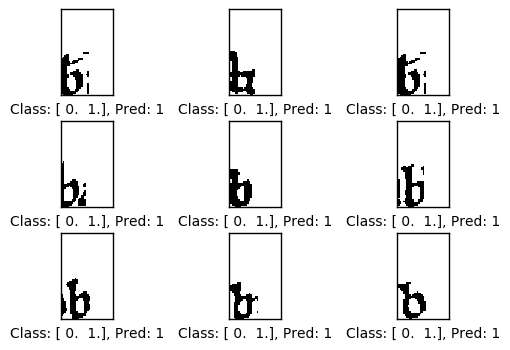


Example of incorrect predictions for char: B


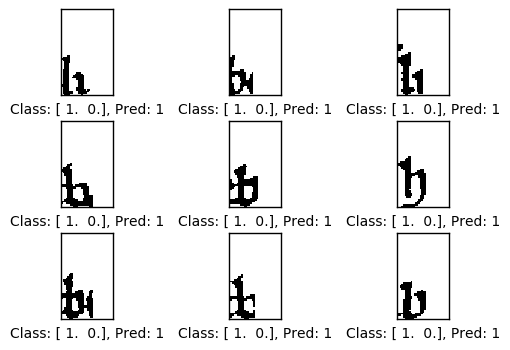

[[70 10]
 [ 0 80]]



---- END ANALISYS FOR CHAR B ----

Trovati 140 esempi positivi per il carattere F .
Campioni di training: 120 	Campioni di test: 20
Richiesti 140 esempi negativi: trovati 140 generici.
Numero totale di campioni di training: 240
Numero totale di campioni di test: 40

---- START ANALISYS FOR CHAR F ----

Start TRAINING for char F
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 39 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 23 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 36 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 17 epoch(s)
Done.



The TRAINING lasted 218.15 seconds
History: 


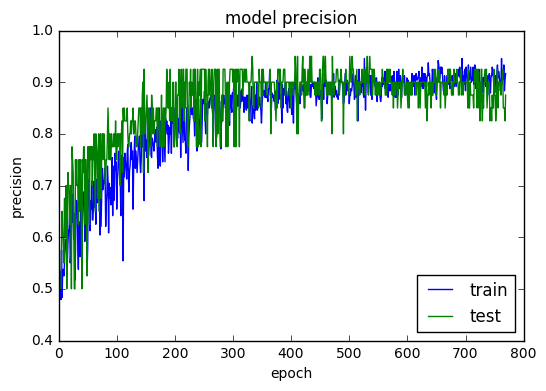

Continuation of training with no pre-processing:


X shape: (40, 34, 56, 1)
40 samples
Evaluating ensemble
32/40 [=======================>......] - ETA: 0sTest accuracy: 95.0 %
Test error: 5.0 %
32/40 [=======================>......] - ETA: 0s
Example of correct predictions for char: F



Example of incorrect predictions for char: F

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[19  1]
 [ 1 19]]


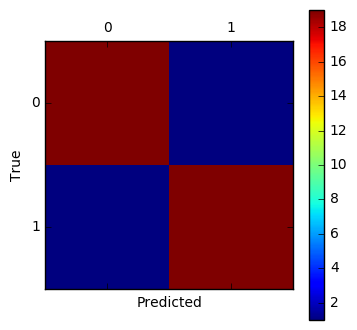


---- END ANALISYS FOR CHAR F ----

Trovati 123 esempi positivi per il carattere H .
Campioni di training: 105 	Campioni di test: 18
Richiesti 123 esempi negativi: trovati 123 generici.
Numero totale di campioni di training: 210
Numero totale di campioni di test: 36

---- START ANALISYS FOR CHAR H ----

Start TRAINING for char H
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 45 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 36 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 18 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 11 epoch(s)
Done.



The TRAINING lasted 206.12 seconds
History: 


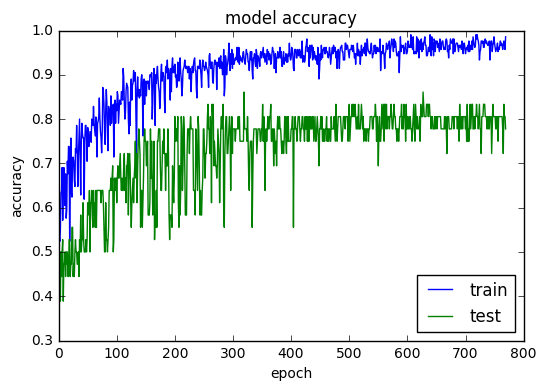

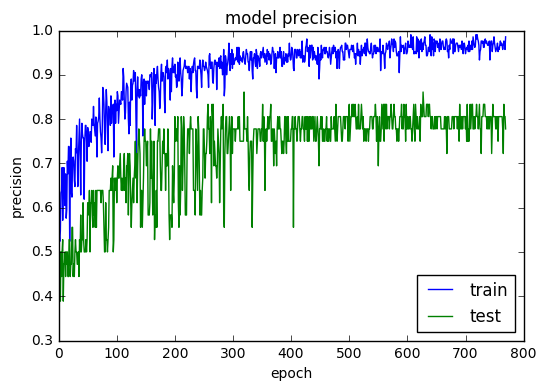

Continuation of training with no pre-processing:


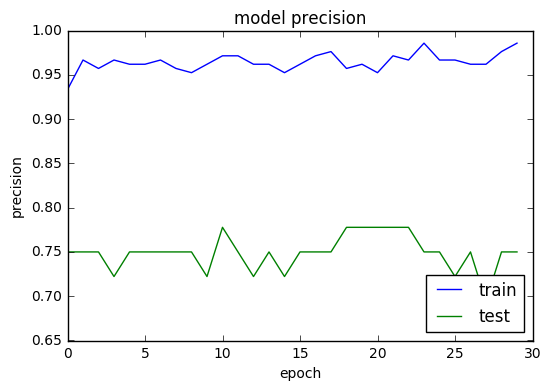

X shape: (36, 34, 56, 1)
36 samples
Evaluating ensemble
32/36 [=========================>....] - ETA: 0sTest accuracy: 77.7777777778 %
Test error: 22.2222222222 %
32/36 [=========================>....] - ETA: 0s
Example of correct predictions for char: H


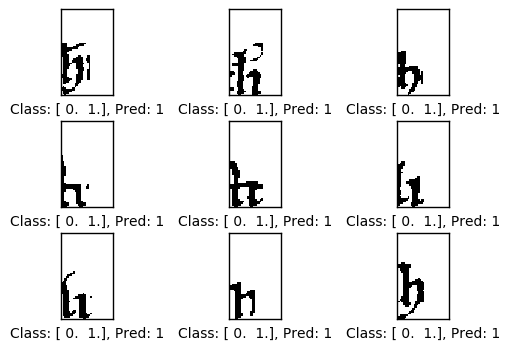


Example of incorrect predictions for char: H

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[14  4]
 [ 4 14]]



---- END ANALISYS FOR CHAR H ----

Trovati 390 esempi positivi per il carattere L .
Campioni di training: 334 	Campioni di test: 56
Richiesti 390 esempi negativi: trovati 390 generici.
Numero totale di campioni di training: 668
Numero totale di campioni di test: 112

---- START ANALISYS FOR CHAR L ----

Start TRAINING for char L
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Done.



The TRAINING lasted 565.88 seconds
History: 


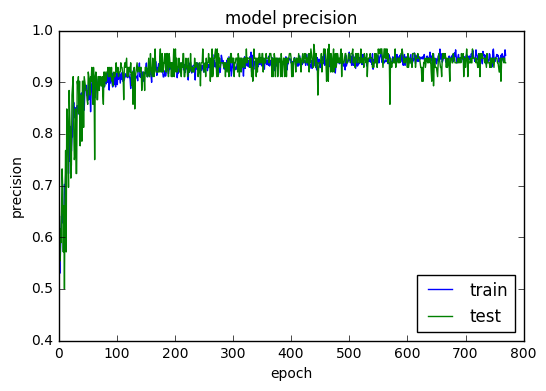

Continuation of training with no pre-processing:


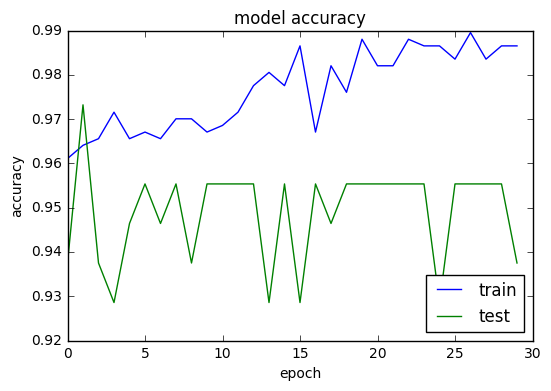

X shape: (112, 34, 56, 1)
112 samples
Evaluating ensemble
112/112 [==============================] - 2s     
Test accuracy: 95.5357142857 %
Test error: 4.46428571429 %
112/112 [==============================] - 2s     

Example of correct predictions for char: L


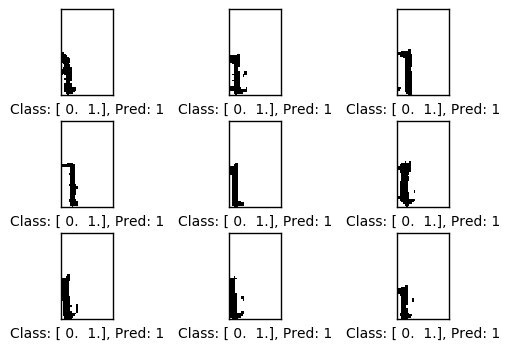


Example of incorrect predictions for char: L

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[53  3]
 [ 2 54]]


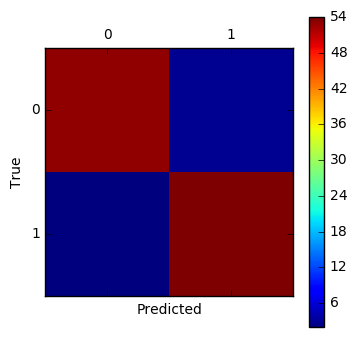


---- END ANALISYS FOR CHAR L ----

Trovati 347 esempi positivi per il carattere G .
Campioni di training: 297 	Campioni di test: 50
Richiesti 347 esempi negativi: trovati 347 generici.
Numero totale di campioni di training: 594
Numero totale di campioni di test: 100

---- START ANALISYS FOR CHAR G ----

Start TRAINING for char G
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 14 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 20 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 11 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 48 epoch(s)
Done.



The TRAINING lasted 500.52 seconds
History: 


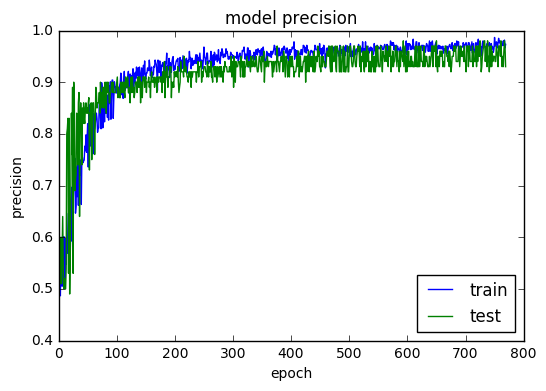

Continuation of training with no pre-processing:


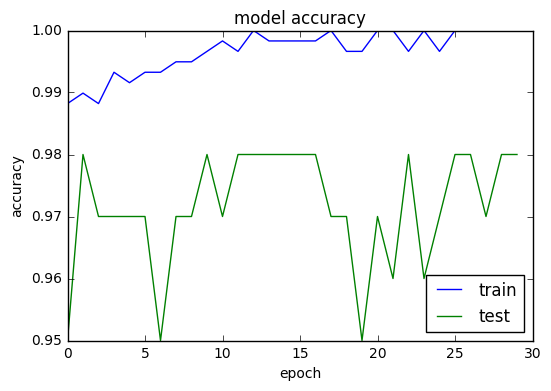

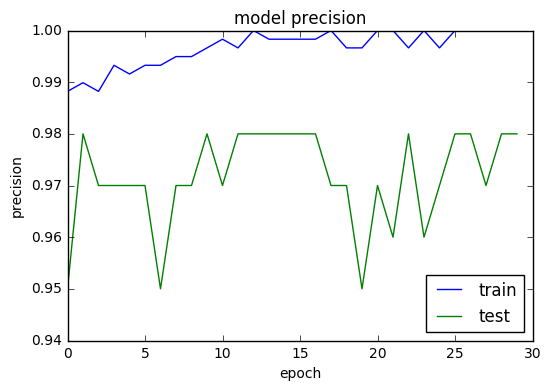

X shape: (100, 34, 56, 1)
100 samples
Evaluating ensemble
 96/100 [===========================>..] - ETA: 0sTest accuracy: 97.0 %
Test error: 3.0 %
 96/100 [===========================>..] - ETA: 0s
Example of correct predictions for char: G



Example of incorrect predictions for char: G

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[49  1]
 [ 2 48]]


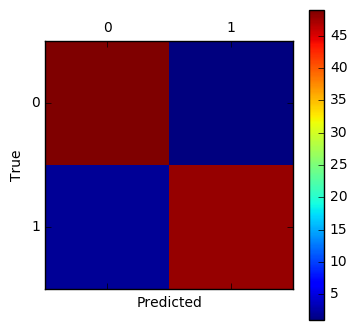


---- END ANALISYS FOR CHAR G ----

Trovati 1255 esempi positivi per il carattere P .
Campioni di training: 1075 	Campioni di test: 180
Richiesti 1255 esempi negativi: trovati 1255 generici.
Numero totale di campioni di training: 2150
Numero totale di campioni di test: 360

---- START ANALISYS FOR CHAR P ----

Start TRAINING for char P
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 44 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 38 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 49 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 12 epoch(s)
Done.



The TRAINING lasted 1678.67 seconds
History: 


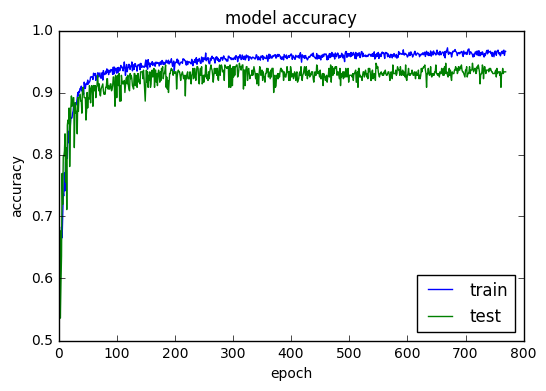

Continuation of training with no pre-processing:


X shape: (360, 34, 56, 1)
360 samples
Evaluating ensemble
352/360 [============================>.] - ETA: 0sTest accuracy: 93.8888888889 %
Test error: 6.11111111111 %
352/360 [============================>.] - ETA: 0s
Example of correct predictions for char: P



Example of incorrect predictions for char: P


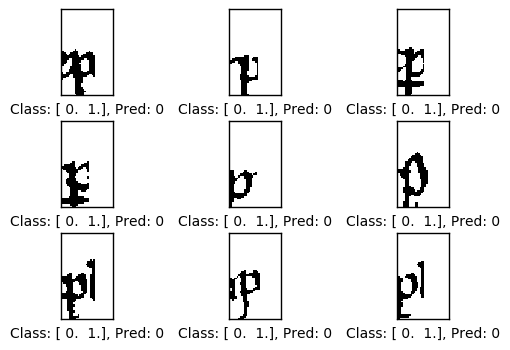

[[167  13]
 [  9 171]]


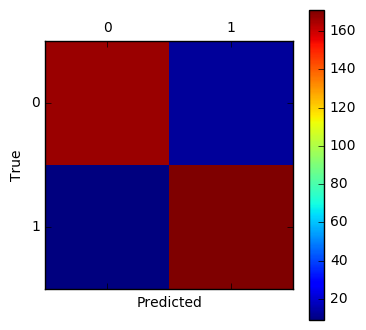


---- END ANALISYS FOR CHAR P ----

Trovati 460 esempi positivi per il carattere Q .
Campioni di training: 394 	Campioni di test: 66
Richiesti 460 esempi negativi: trovati 460 generici.
Numero totale di campioni di training: 788
Numero totale di campioni di test: 132

---- START ANALISYS FOR CHAR Q ----

Start TRAINING for char Q
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 46 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 26 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 37 epoch(s)
Done.



The TRAINING lasted 724.24 seconds
History: 


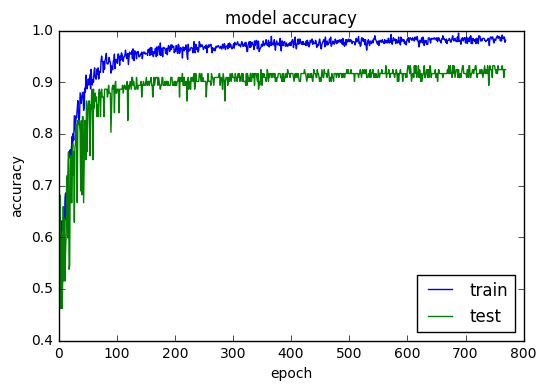

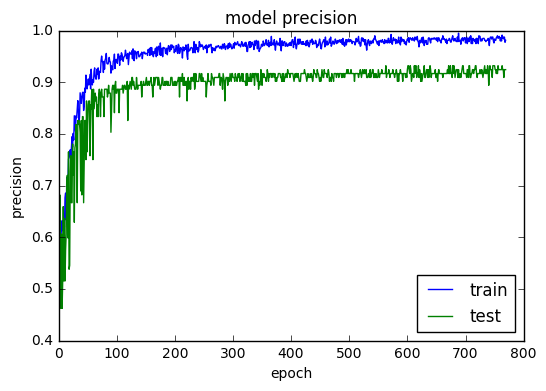

Continuation of training with no pre-processing:


X shape: (132, 34, 56, 1)
132 samples
Evaluating ensemble
128/132 [============================>.] - ETA: 0sTest accuracy: 93.1818181818 %
Test error: 6.81818181818 %
128/132 [============================>.] - ETA: 0s
Example of correct predictions for char: Q


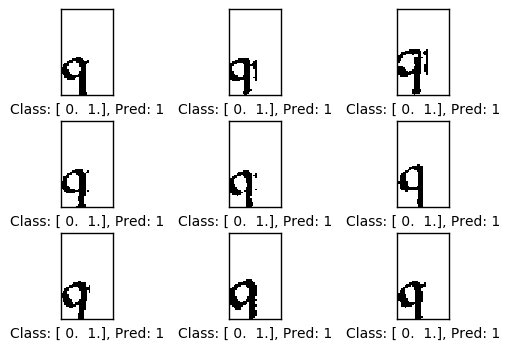


Example of incorrect predictions for char: Q


[[64  2]
 [ 7 59]]



---- END ANALISYS FOR CHAR Q ----

Trovati 335 esempi positivi per il carattere S_BASSA .
Campioni di training: 287 	Campioni di test: 48
Richiesti 335 esempi negativi: trovati 335 generici.
Numero totale di campioni di training: 574
Numero totale di campioni di test: 96

---- START ANALISYS FOR CHAR S_BASSA ----

Start TRAINING for char S_BASSA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 40 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 44 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 20 epoch(s)
Done.



The TRAINING lasted 512.62 seconds
History: 


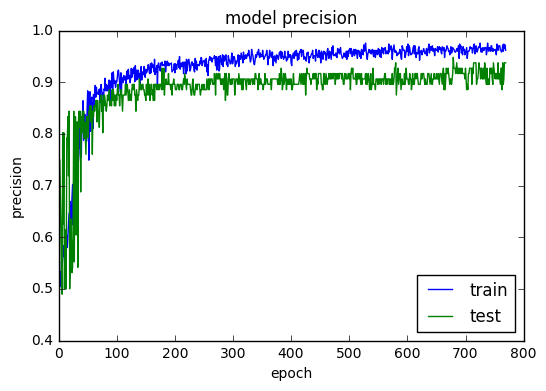

Continuation of training with no pre-processing:


X shape: (96, 34, 56, 1)
96 samples
Evaluating ensemble
96/96 [==============================] - 2s     
Test accuracy: 93.75 %
Test error: 6.25 %
96/96 [==============================] - 2s     

Example of correct predictions for char: S_BASSA



Example of incorrect predictions for char: S_BASSA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[44  4]
 [ 2 46]]



---- END ANALISYS FOR CHAR S_BASSA ----



In [4]:
analyze_all_letters(directories)

In [4]:
directories2 = []

for letter in dataset.ALPHABET_ALL:
    directories2.append(os.path.join("checkpoints", letter + "2"))
    

for mydir in directories2:
    if not os.path.exists(mydir):
        os.makedirs(mydir)

Trovati 1638 esempi positivi per il carattere A .
Campioni di training: 1404 	Campioni di test: 234
Richiesti 3276 esempi negativi: trovati 3276 generici.
Numero totale di campioni di training: 4212
Numero totale di campioni di test: 702

---- START ANALISYS FOR CHAR A ----

Start TRAINING for char A
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 33 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 42 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 11 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Done.



The TRAINING lasted 2758.34 seconds
History: 


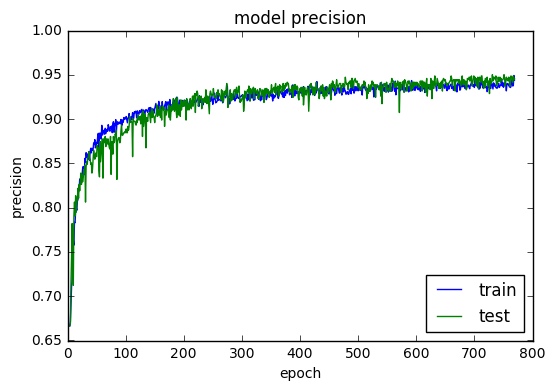

Continuation of training with no pre-processing:


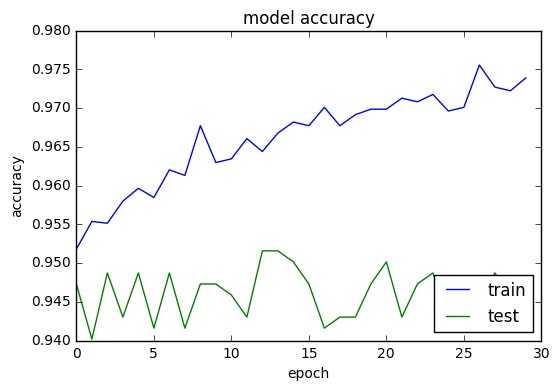

X shape: (702, 34, 56, 1)
702 samples
Evaluating ensemble
702/702 [==============================] - 0s     
Test accuracy: 95.5840457199 %
Test error: 4.41595453482 %
672/702 [===========================>..] - ETA: 0s
Example of correct predictions for char: A


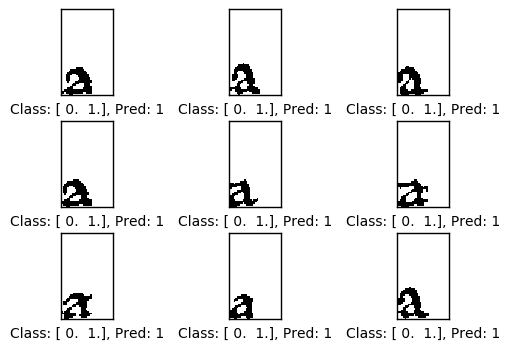


Example of incorrect predictions for char: A


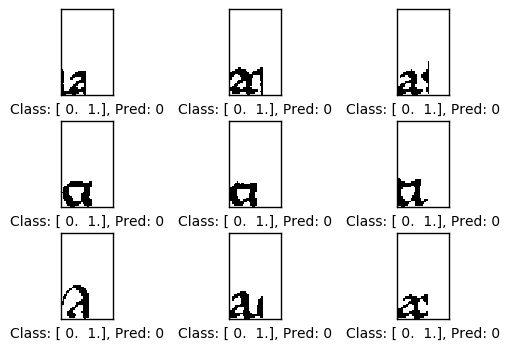

[[449  19]
 [ 12 222]]


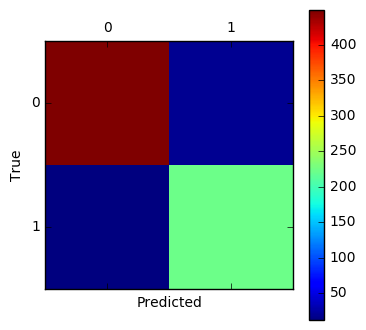


---- END ANALISYS FOR CHAR A ----

Trovati 655 esempi positivi per il carattere C .
Campioni di training: 561 	Campioni di test: 94
Richiesti 1310 esempi negativi: trovati 1310 generici.
Numero totale di campioni di training: 1683
Numero totale di campioni di test: 282

---- START ANALISYS FOR CHAR C ----

Start TRAINING for char C
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 46 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 22 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 40 epoch(s)
Done.



The TRAINING lasted 1419.68 seconds
History: 


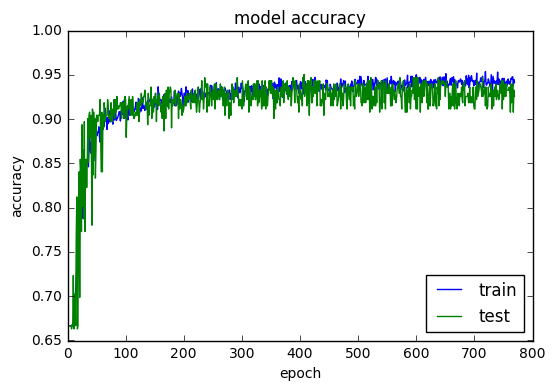

Continuation of training with no pre-processing:


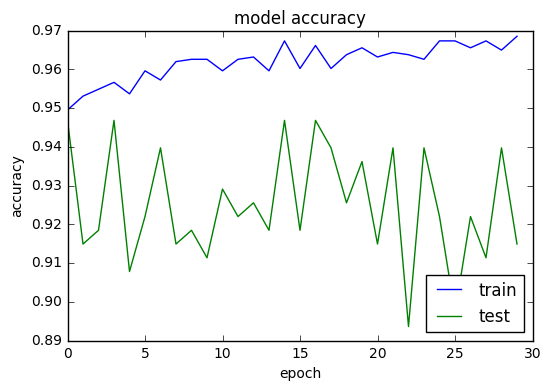

X shape: (282, 34, 56, 1)
282 samples
Evaluating ensemble
282/282 [==============================] - 0s     
Test accuracy: 94.6808513597 %
Test error: 5.31914918981 %
282/282 [==============================] - 0s     

Example of correct predictions for char: C


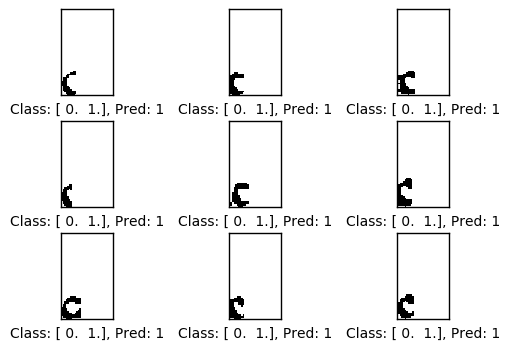


Example of incorrect predictions for char: C


[[178  10]
 [  5  89]]


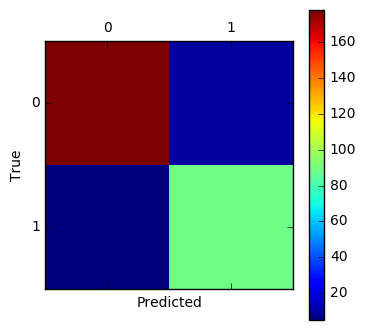


---- END ANALISYS FOR CHAR C ----

Trovati 406 esempi positivi per il carattere D_MEDIANA .
Campioni di training: 348 	Campioni di test: 58
Richiesti 812 esempi negativi: trovati 812 generici.
Numero totale di campioni di training: 1044
Numero totale di campioni di test: 174

---- START ANALISYS FOR CHAR D_MEDIANA ----

Start TRAINING for char D_MEDIANA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 39 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 15 epoch(s)
Done.



The TRAINING lasted 797.32 seconds
History: 


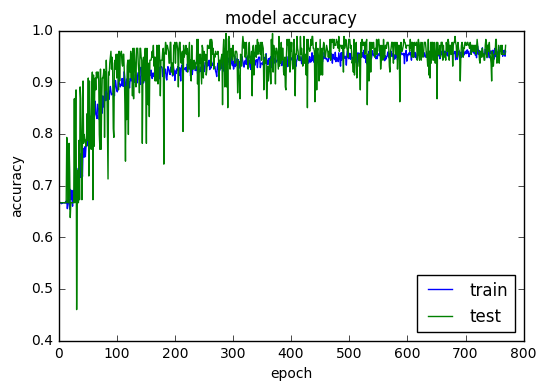

Continuation of training with no pre-processing:


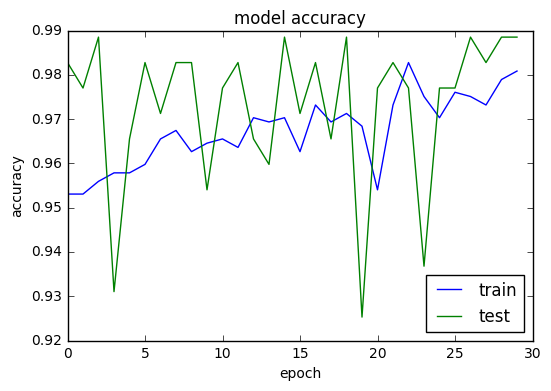

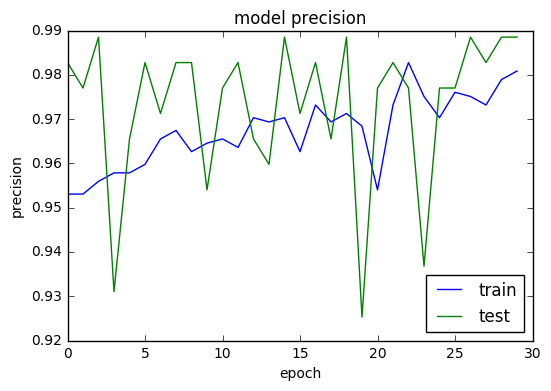

X shape: (174, 34, 56, 1)
174 samples
Evaluating ensemble
160/174 [==========================>...] - ETA: 0sTest accuracy: 98.275862069 %
Test error: 1.72413793103 %
160/174 [==========================>...] - ETA: 0s
Example of correct predictions for char: D_MEDIANA


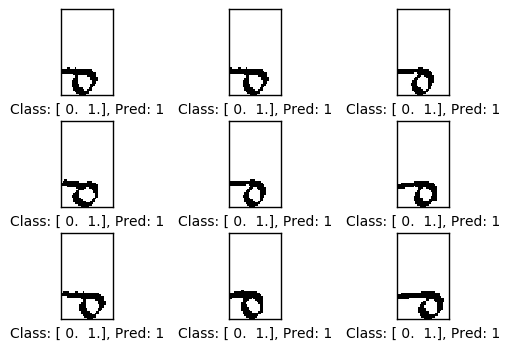


Example of incorrect predictions for char: D_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[115   1]
 [  2  56]]



---- END ANALISYS FOR CHAR D_MEDIANA ----

Trovati 2827 esempi positivi per il carattere E .
Campioni di training: 2423 	Campioni di test: 404
Richiesti 5654 esempi negativi: trovati 5654 generici.
Numero totale di campioni di training: 7269
Numero totale di campioni di test: 1212

---- START ANALISYS FOR CHAR E ----

Start TRAINING for char E
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 45 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 41 epoch(s)
Done.



The TRAINING lasted 5220.25 seconds
History: 


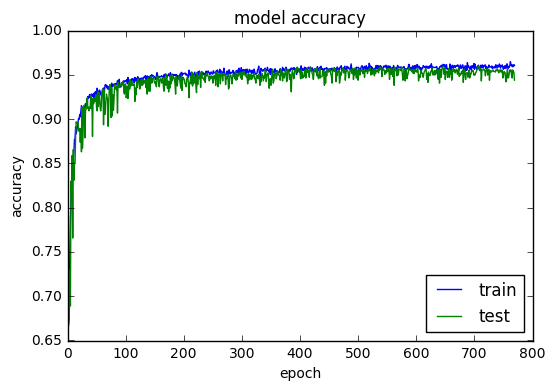

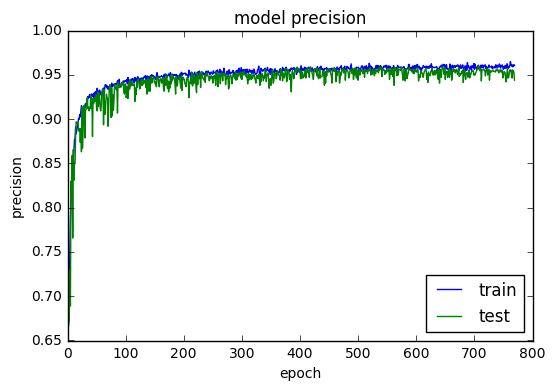

Continuation of training with no pre-processing:


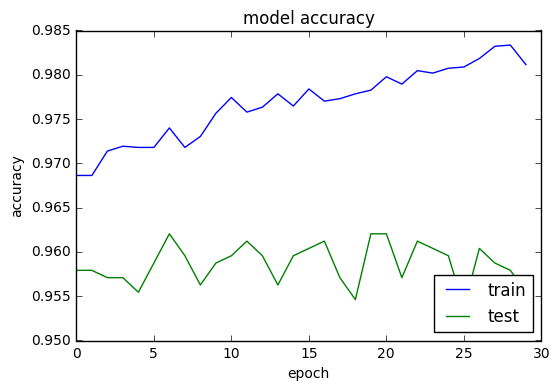

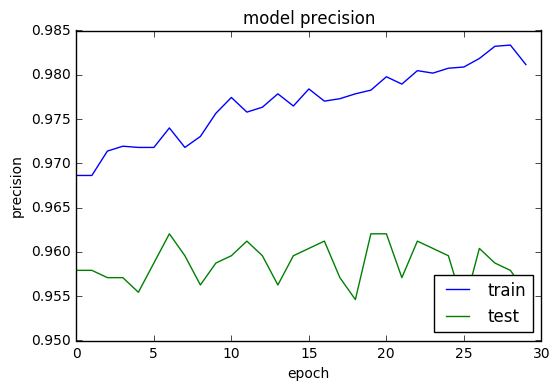

X shape: (1212, 34, 56, 1)
1212 samples
Evaluating ensemble
1212/1212 [==============================] - 1s     
Test accuracy: 96.204620462 %
Test error: 3.79537953795 %
1212/1212 [==============================] - 0s     

Example of correct predictions for char: E



Example of incorrect predictions for char: E


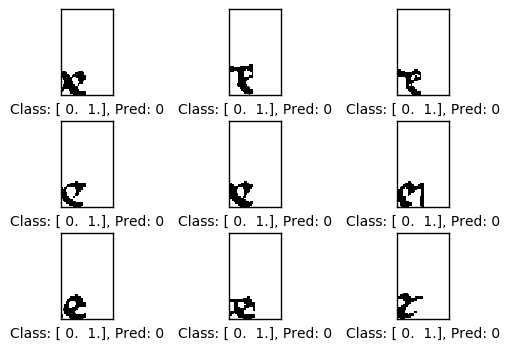

[[777  31]
 [ 15 389]]



---- END ANALISYS FOR CHAR E ----

Trovati 798 esempi positivi per il carattere I .
Campioni di training: 684 	Campioni di test: 114
Richiesti 1596 esempi negativi: trovati 1596 generici.
Numero totale di campioni di training: 2052
Numero totale di campioni di test: 342

---- START ANALISYS FOR CHAR I ----

Start TRAINING for char I
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 42 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 18 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 15 epoch(s)
Done.



The TRAINING lasted 1778.51 seconds
History: 


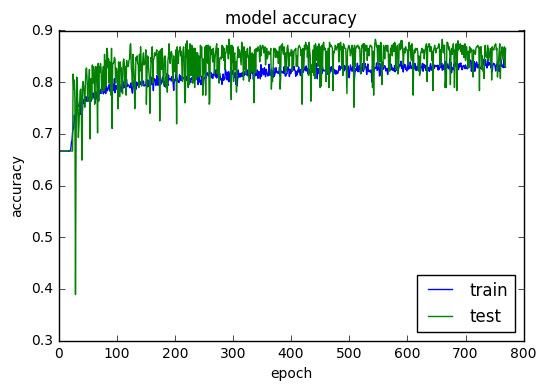

Continuation of training with no pre-processing:


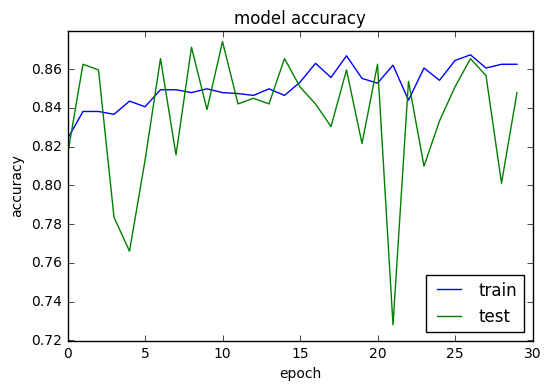

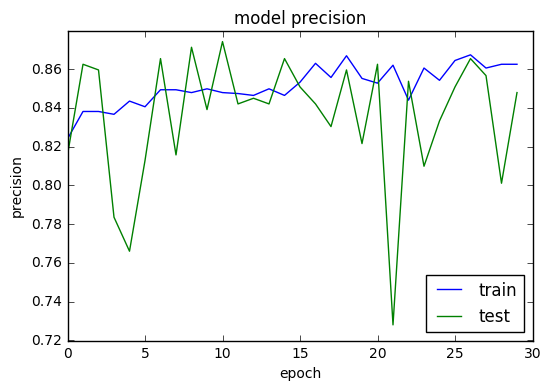

X shape: (342, 34, 56, 1)
342 samples
Evaluating ensemble
342/342 [==============================] - 0s     
Test accuracy: 87.7192985942 %
Test error: 12.2807017892 %
342/342 [==============================] - 0s     

Example of correct predictions for char: I


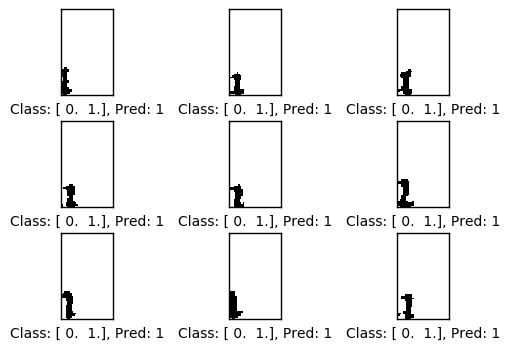


Example of incorrect predictions for char: I


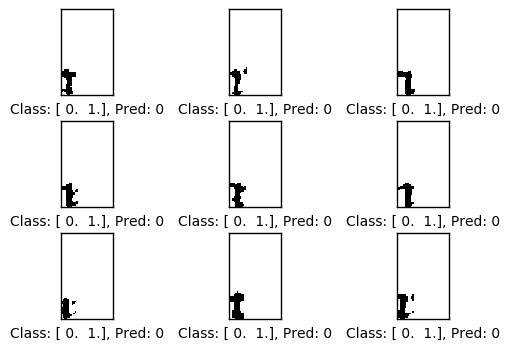

[[206  22]
 [ 20  94]]


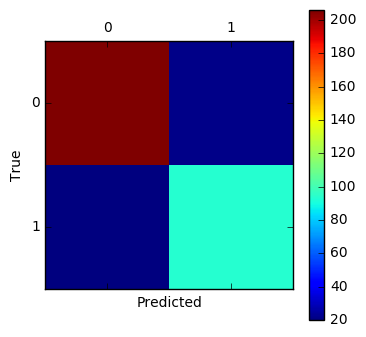


---- END ANALISYS FOR CHAR I ----

Trovati 1514 esempi positivi per il carattere M .
Campioni di training: 1297 	Campioni di test: 217
Richiesti 3028 esempi negativi: trovati 3028 generici.
Numero totale di campioni di training: 3892
Numero totale di campioni di test: 650

---- START ANALISYS FOR CHAR M ----

Start TRAINING for char M
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Done.



The TRAINING lasted 2730.34 seconds
History: 


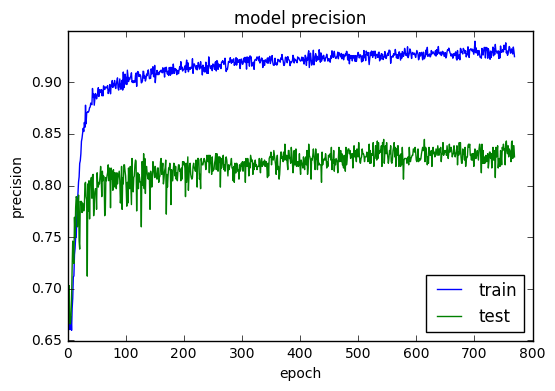

Continuation of training with no pre-processing:


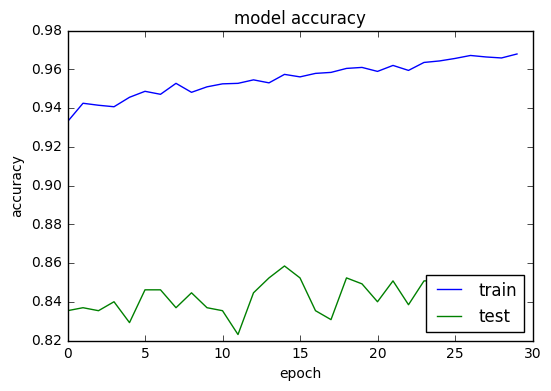

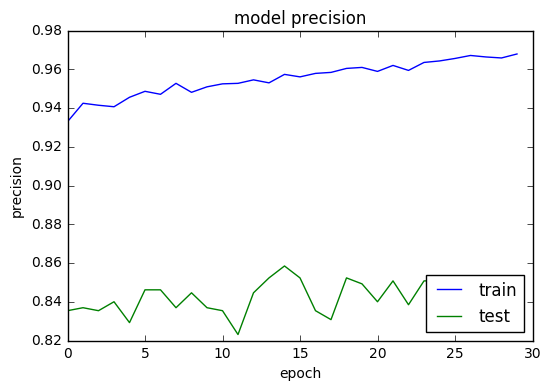

X shape: (650, 34, 56, 1)
650 samples
Evaluating ensemble
640/650 [============================>.] - ETA: 0sTest accuracy: 86.7692307692 %
Test error: 13.2307692308 %
650/650 [==============================] - 0s     

Example of correct predictions for char: M


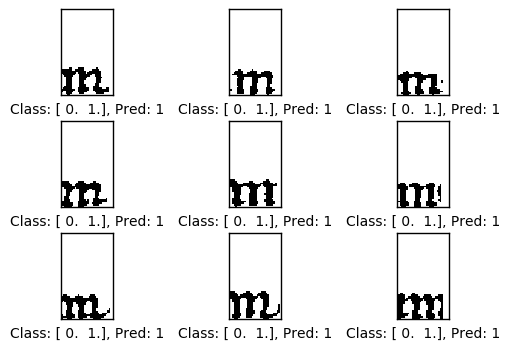


Example of incorrect predictions for char: M


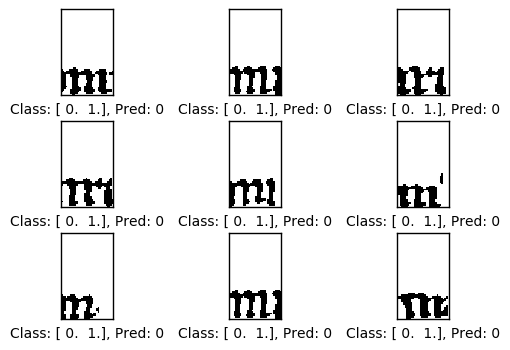

[[396  37]
 [ 49 168]]


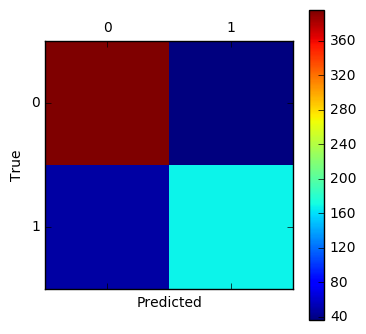


---- END ANALISYS FOR CHAR M ----

Trovati 1950 esempi positivi per il carattere N .
Campioni di training: 1671 	Campioni di test: 279
Richiesti 3900 esempi negativi: trovati 3900 generici.
Numero totale di campioni di training: 5013
Numero totale di campioni di test: 837

---- START ANALISYS FOR CHAR N ----

Start TRAINING for char N
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 22 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Done.



The TRAINING lasted 3556.97 seconds
History: 


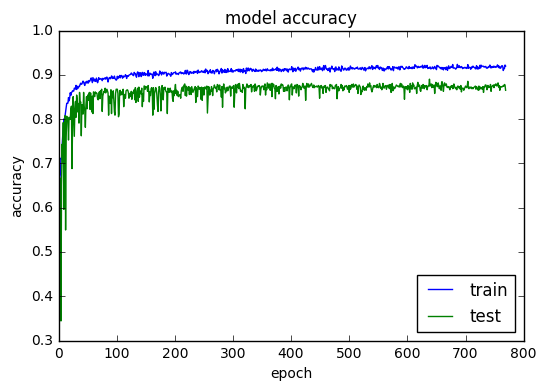

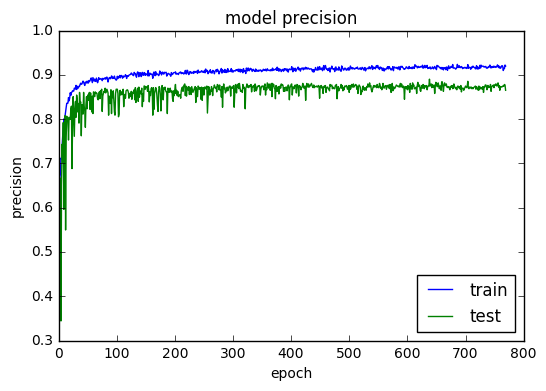

Continuation of training with no pre-processing:


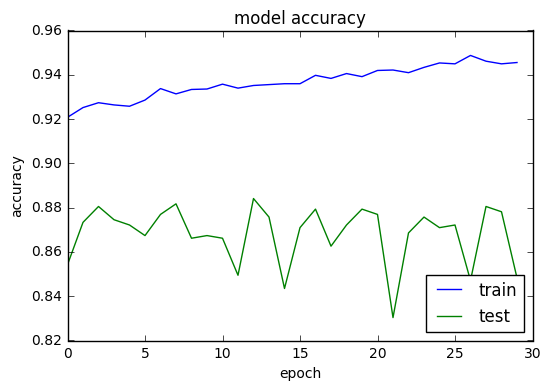

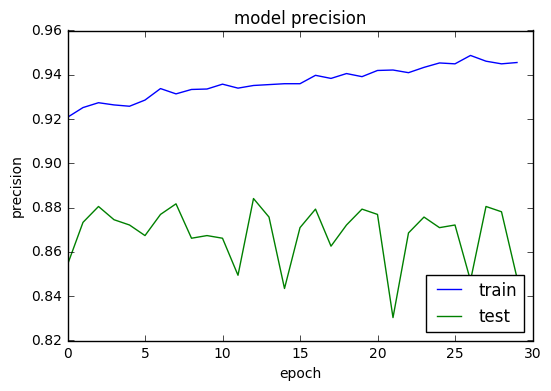

X shape: (837, 34, 56, 1)
837 samples
Evaluating ensemble
837/837 [==============================] - 1s     
Test accuracy: 88.888888896 %
Test error: 11.111111104 %
837/837 [==============================] - 0s     

Example of correct predictions for char: N


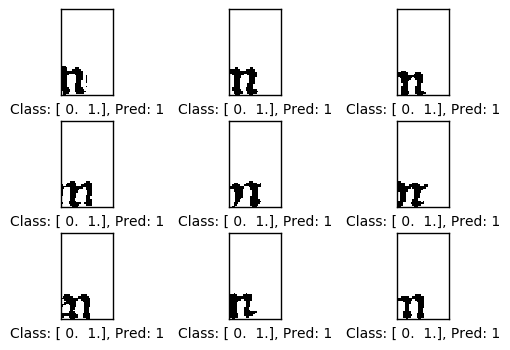


Example of incorrect predictions for char: N


[[509  49]
 [ 44 235]]


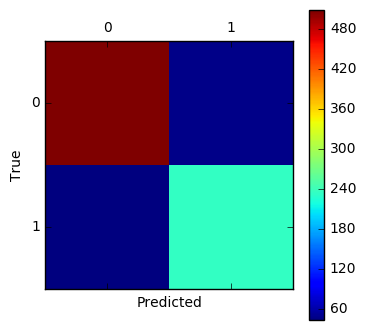


---- END ANALISYS FOR CHAR N ----

Trovati 711 esempi positivi per il carattere O .
Campioni di training: 609 	Campioni di test: 102
Richiesti 1422 esempi negativi: trovati 1422 generici.
Numero totale di campioni di training: 1827
Numero totale di campioni di test: 306

---- START ANALISYS FOR CHAR O ----

Start TRAINING for char O
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 33 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 11 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Done.



The TRAINING lasted 1302.27 seconds
History: 


Continuation of training with no pre-processing:


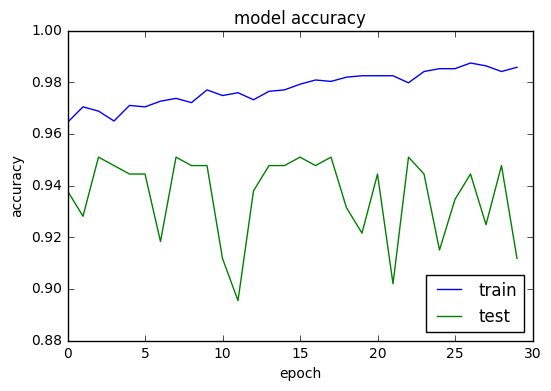

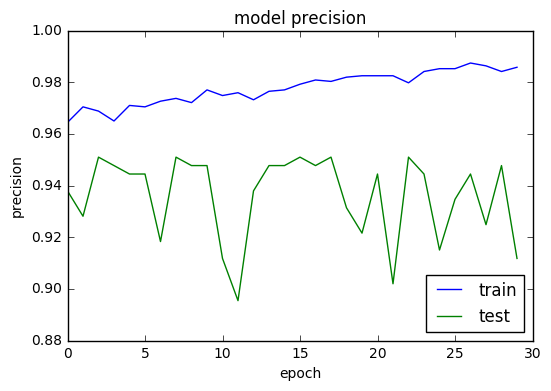

X shape: (306, 34, 56, 1)
306 samples
Evaluating ensemble
288/306 [===========================>..] - ETA: 0sTest accuracy: 95.4248366013 %
Test error: 4.57516339869 %
288/306 [===========================>..] - ETA: 0s
Example of correct predictions for char: O


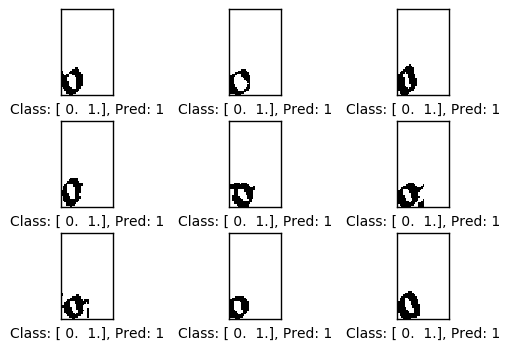


Example of incorrect predictions for char: O


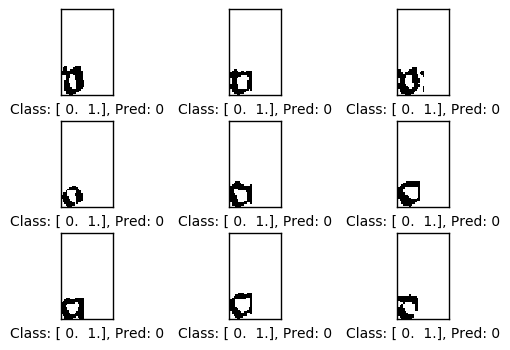

[[200   4]
 [ 10  92]]


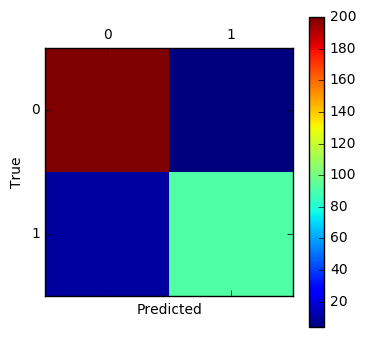


---- END ANALISYS FOR CHAR O ----

Trovati 309 esempi positivi per il carattere R .
Campioni di training: 264 	Campioni di test: 45
Richiesti 618 esempi negativi: trovati 618 generici.
Numero totale di campioni di training: 793
Numero totale di campioni di test: 134

---- START ANALISYS FOR CHAR R ----

Start TRAINING for char R
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 31 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 18 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Done.



The TRAINING lasted 613.89 seconds
History: 


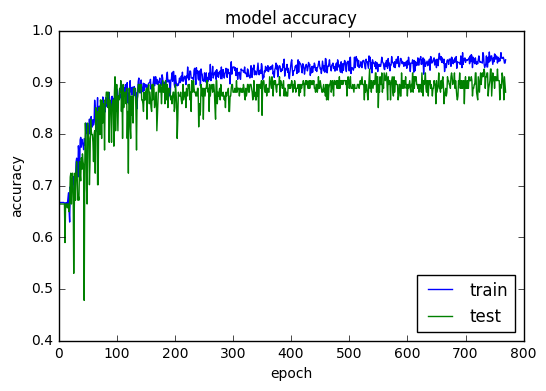

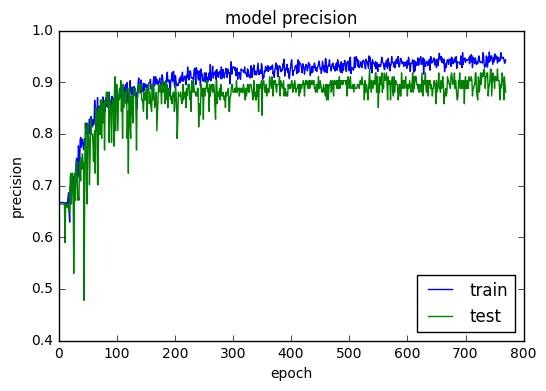

Continuation of training with no pre-processing:


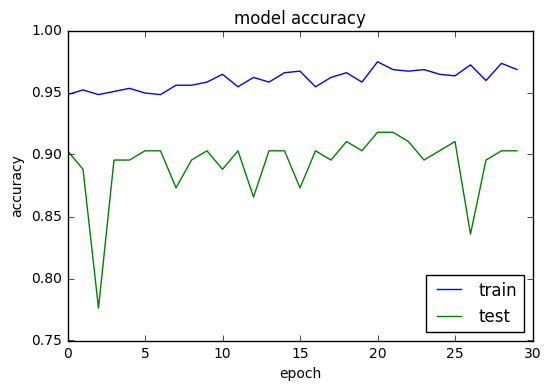

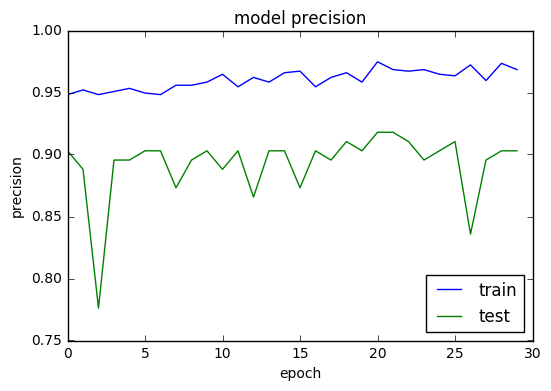

X shape: (134, 34, 56, 1)
134 samples
Evaluating ensemble
128/134 [===========================>..] - ETA: 0sTest accuracy: 92.5373134328 %
Test error: 7.46268656716 %
134/134 [==============================] - 1s     

Example of correct predictions for char: R


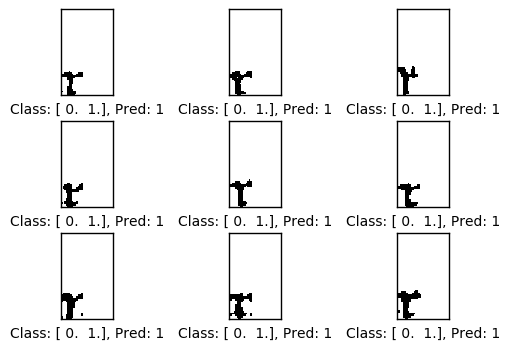


Example of incorrect predictions for char: R


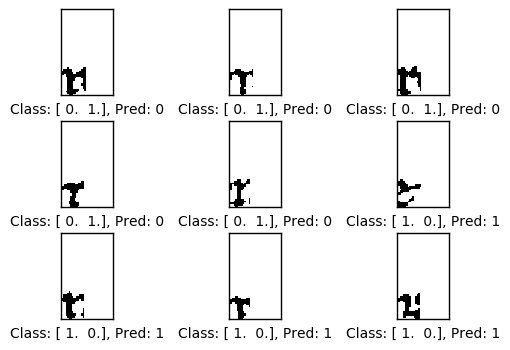

[[84  5]
 [ 5 40]]


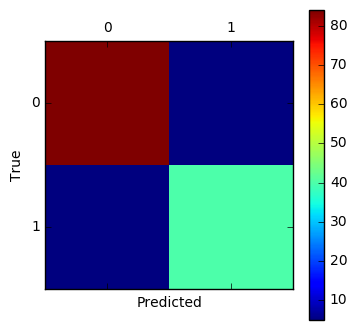


---- END ANALISYS FOR CHAR R ----

Trovati 100 esempi positivi per il carattere S_MEDIANA .
Campioni di training: 85 	Campioni di test: 15
Richiesti 200 esempi negativi: trovati 200 generici.
Numero totale di campioni di training: 256
Numero totale di campioni di test: 44

---- START ANALISYS FOR CHAR S_MEDIANA ----

Start TRAINING for char S_MEDIANA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 48 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 43 epoch(s)
Done.



The TRAINING lasted 207.44 seconds
History: 


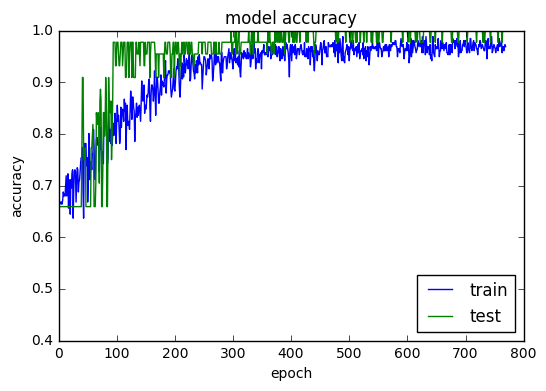

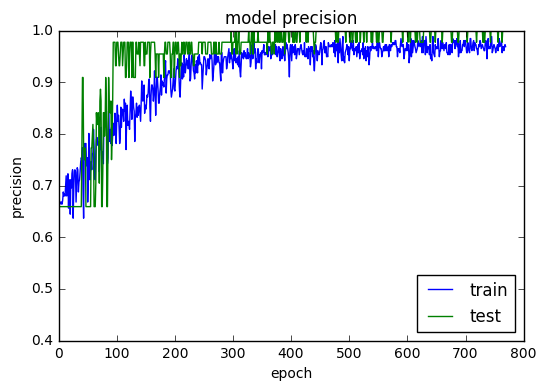

Continuation of training with no pre-processing:


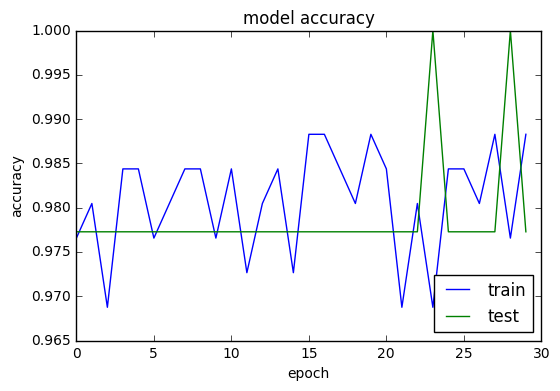

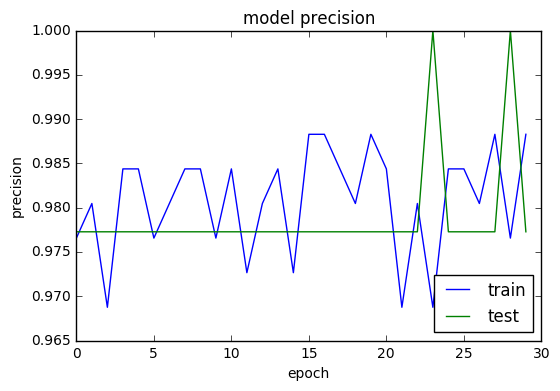

X shape: (44, 34, 56, 1)
44 samples
Evaluating ensemble
44/44 [==============================] - 1s     
Test accuracy: 100.0 %
Test error: 0.0 %
32/44 [====================>.........] - ETA: 0s
Example of correct predictions for char: S_MEDIANA


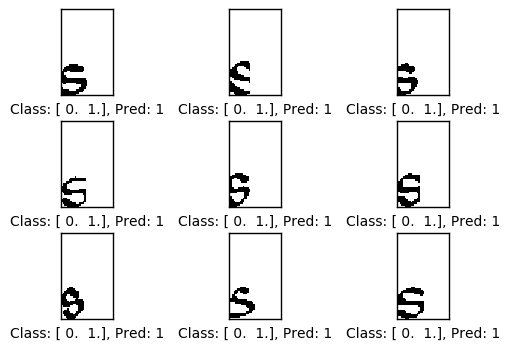


Example of incorrect predictions for char: S_MEDIANA

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[29  0]
 [ 0 15]]


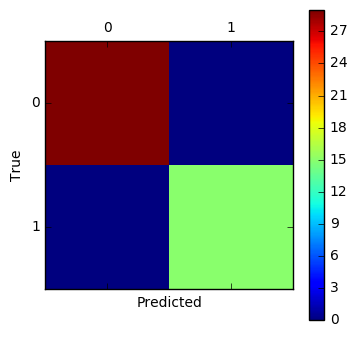


---- END ANALISYS FOR CHAR S_MEDIANA ----

Trovati 1530 esempi positivi per il carattere T .
Campioni di training: 1311 	Campioni di test: 219
Richiesti 3060 esempi negativi: trovati 3060 generici.
Numero totale di campioni di training: 3933
Numero totale di campioni di test: 657

---- START ANALISYS FOR CHAR T ----

Start TRAINING for char T
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 39 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 17 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 45 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 45 epoch(s)
Done.



The TRAINING lasted 2822.63 seconds
History: 


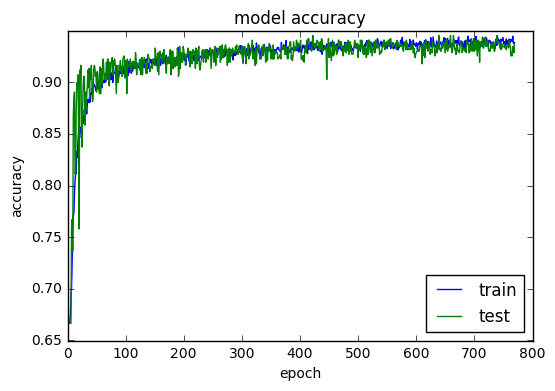

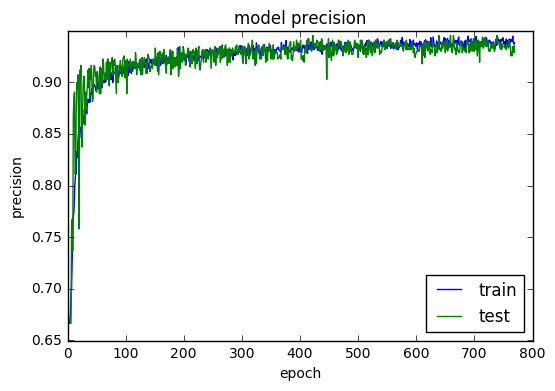

Continuation of training with no pre-processing:


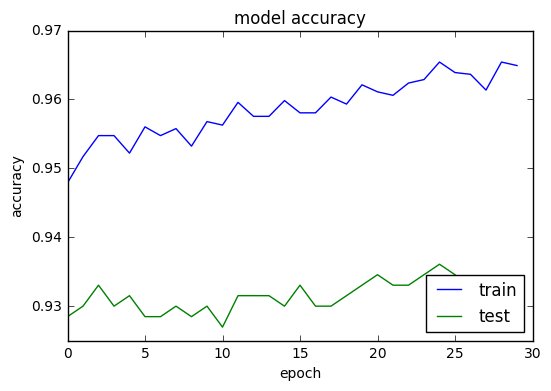

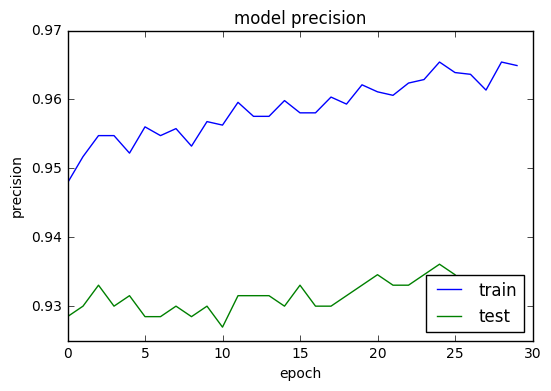

X shape: (657, 34, 56, 1)
657 samples
Evaluating ensemble
640/657 [============================>.] - ETA: 0sTest accuracy: 94.0639269497 %
Test error: 5.93607305029 %
640/657 [============================>.] - ETA: 0s
Example of correct predictions for char: T


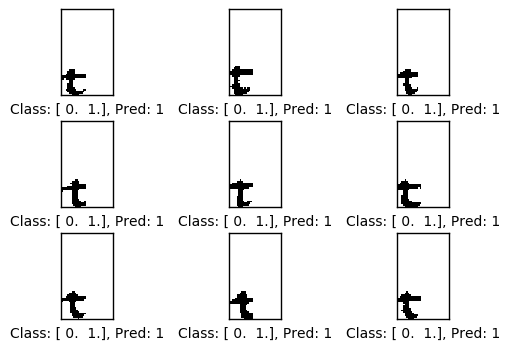


Example of incorrect predictions for char: T


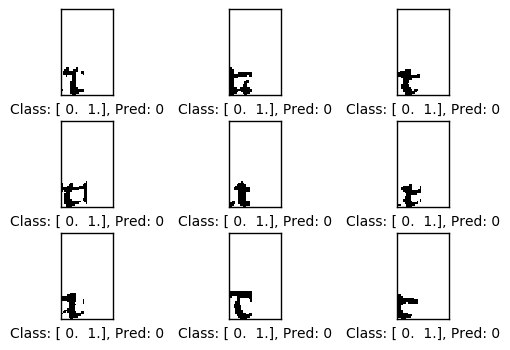

[[409  29]
 [ 10 209]]


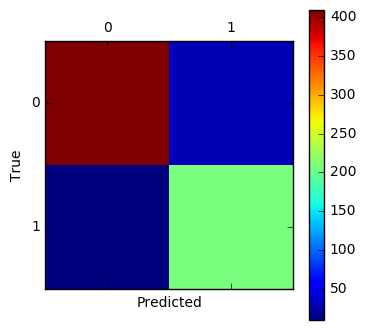


---- END ANALISYS FOR CHAR T ----

Trovati 1146 esempi positivi per il carattere U .
Campioni di training: 982 	Campioni di test: 164
Richiesti 2292 esempi negativi: trovati 2292 generici.
Numero totale di campioni di training: 2946
Numero totale di campioni di test: 492

---- START ANALISYS FOR CHAR U ----

Start TRAINING for char U
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 38 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 33 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 47 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Done.



The TRAINING lasted 4125.17 seconds
History: 


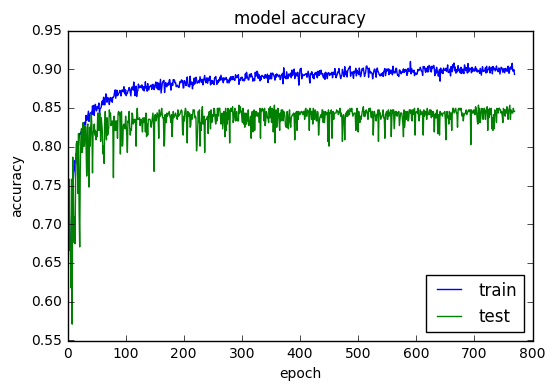

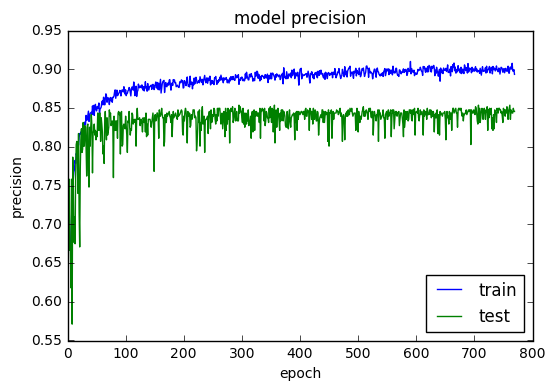

Continuation of training with no pre-processing:


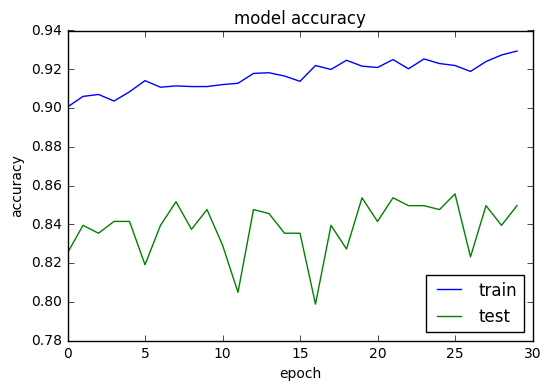

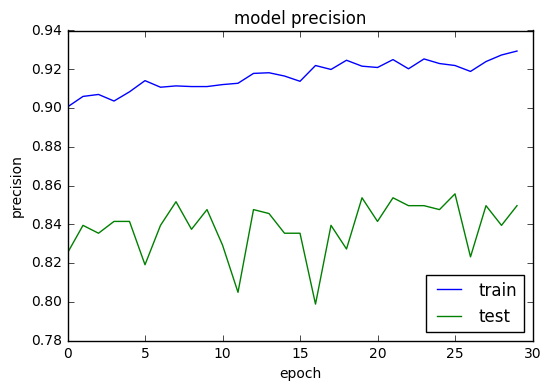

X shape: (492, 34, 56, 1)
492 samples
Evaluating ensemble
480/492 [============================>.] - ETA: 0sTest accuracy: 85.975609853 %
Test error: 14.0243902924 %
492/492 [==============================] - 1s     

Example of correct predictions for char: U


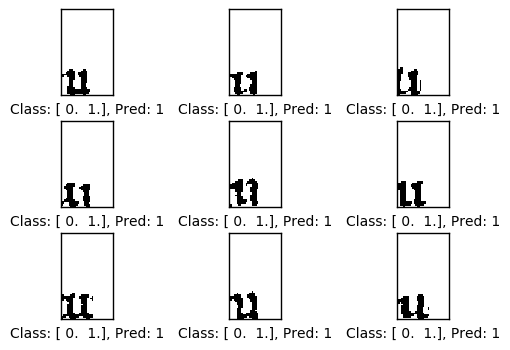


Example of incorrect predictions for char: U


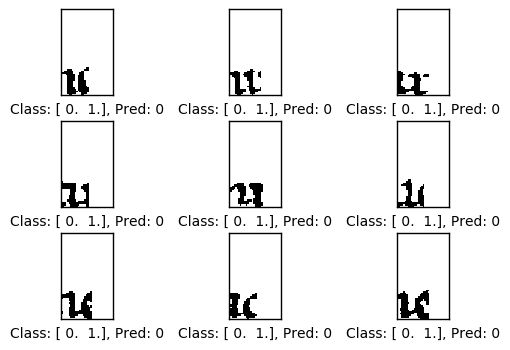

[[285  43]
 [ 26 138]]


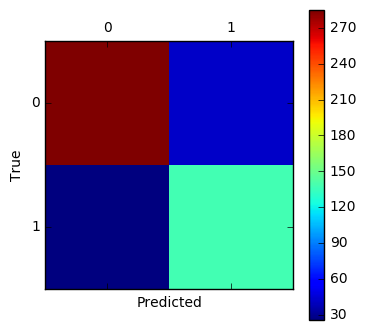


---- END ANALISYS FOR CHAR U ----

Trovati 599 esempi positivi per il carattere D_ALTA .
Campioni di training: 513 	Campioni di test: 86
Richiesti 1198 esempi negativi: trovati 1198 generici.
Numero totale di campioni di training: 1539
Numero totale di campioni di test: 258

---- START ANALISYS FOR CHAR D_ALTA ----

Start TRAINING for char D_ALTA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 13 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 47 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 33 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Done.



The TRAINING lasted 1699.89 seconds
History: 


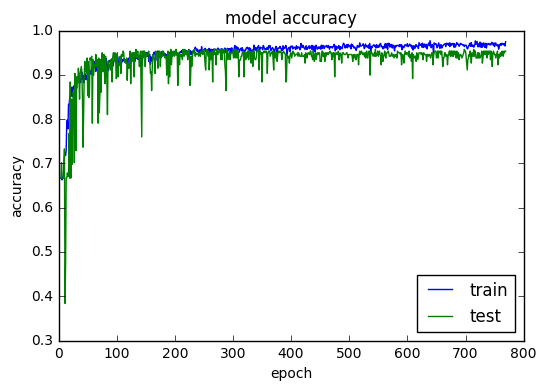

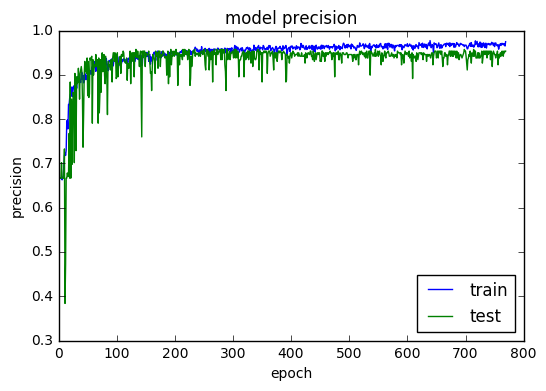

Continuation of training with no pre-processing:


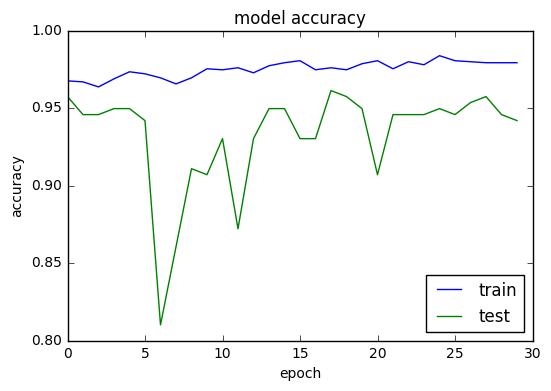

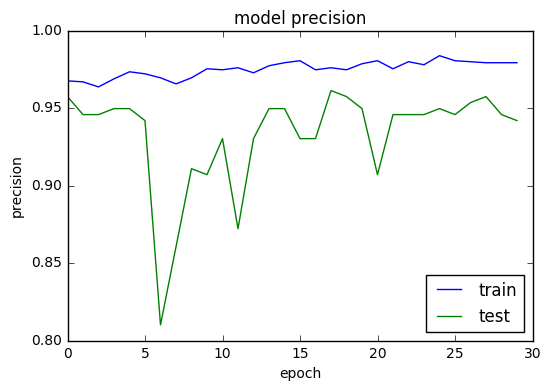

X shape: (258, 34, 56, 1)
258 samples
Evaluating ensemble
256/258 [============================>.] - ETA: 0sTest accuracy: 95.7364341085 %
Test error: 4.26356589147 %
256/258 [============================>.] - ETA: 0s
Example of correct predictions for char: D_ALTA


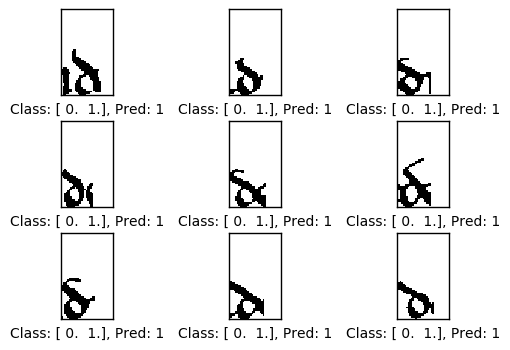


Example of incorrect predictions for char: D_ALTA


[[164   8]
 [  3  83]]


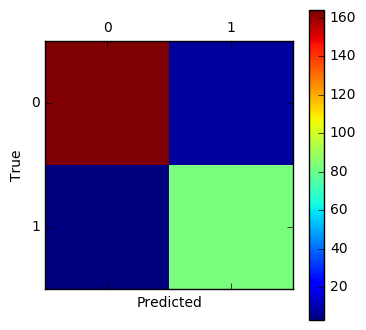


---- END ANALISYS FOR CHAR D_ALTA ----

Trovati 796 esempi positivi per il carattere S_ALTA .
Campioni di training: 682 	Campioni di test: 114
Richiesti 1592 esempi negativi: trovati 1592 generici.
Numero totale di campioni di training: 2046
Numero totale di campioni di test: 342

---- START ANALISYS FOR CHAR S_ALTA ----

Start TRAINING for char S_ALTA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 26 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 14 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 31 epoch(s)
Done.



The TRAINING lasted 1560.62 seconds
History: 


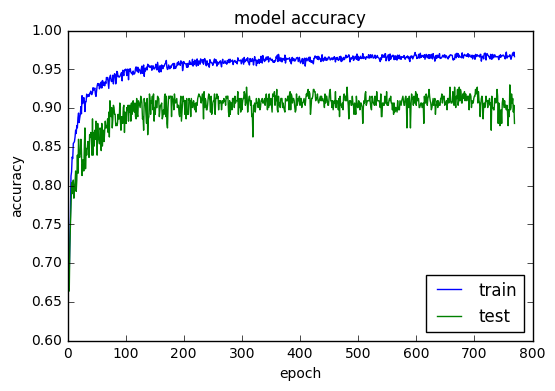

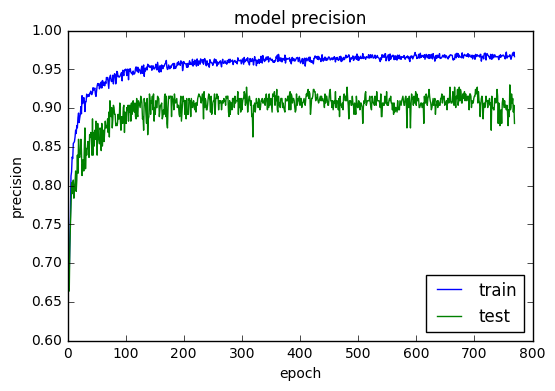

Continuation of training with no pre-processing:


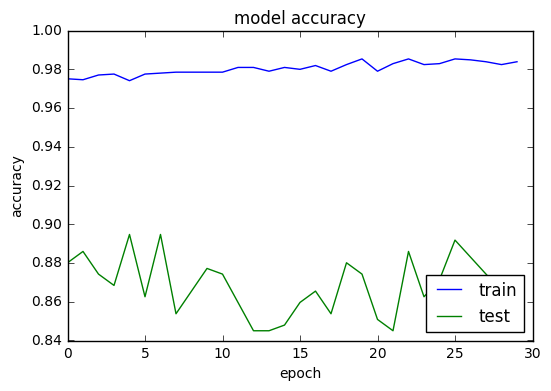

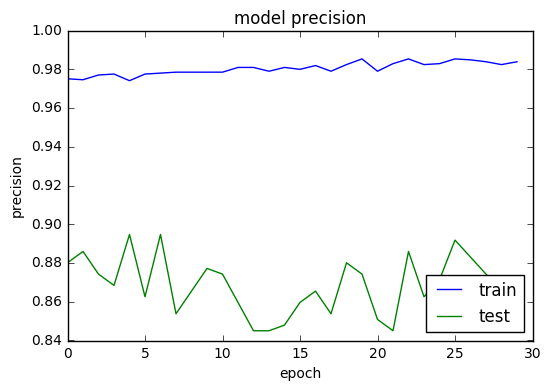

X shape: (342, 34, 56, 1)
342 samples
Evaluating ensemble
342/342 [==============================] - 1s     
Test accuracy: 92.9824561404 %
Test error: 7.01754385965 %
320/342 [===========================>..] - ETA: 0s
Example of correct predictions for char: S_ALTA


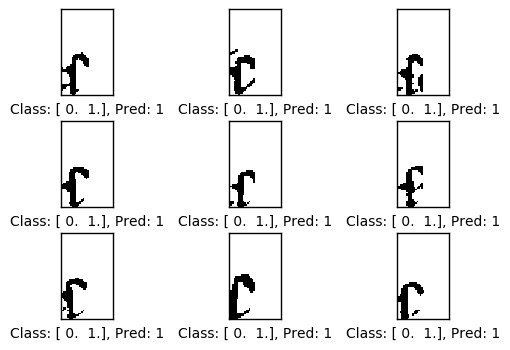


Example of incorrect predictions for char: S_ALTA


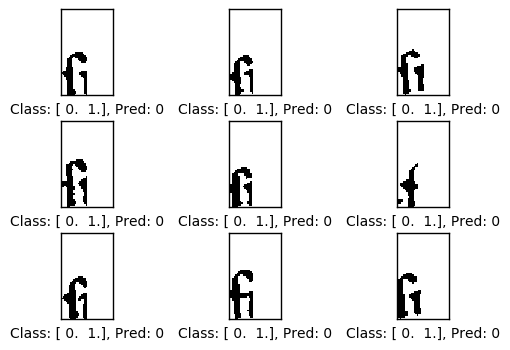

[[216  12]
 [ 12 102]]


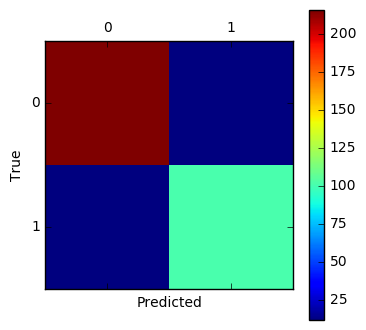


---- END ANALISYS FOR CHAR S_ALTA ----

Trovati 554 esempi positivi per il carattere B .
Campioni di training: 474 	Campioni di test: 80
Richiesti 1108 esempi negativi: trovati 1108 generici.
Numero totale di campioni di training: 1423
Numero totale di campioni di test: 239

---- START ANALISYS FOR CHAR B ----

Start TRAINING for char B
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Done.



The TRAINING lasted 1203.91 seconds
History: 


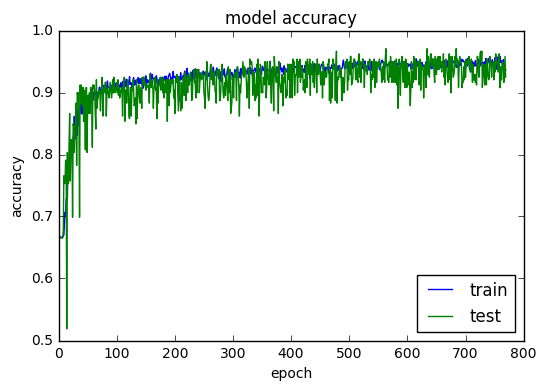

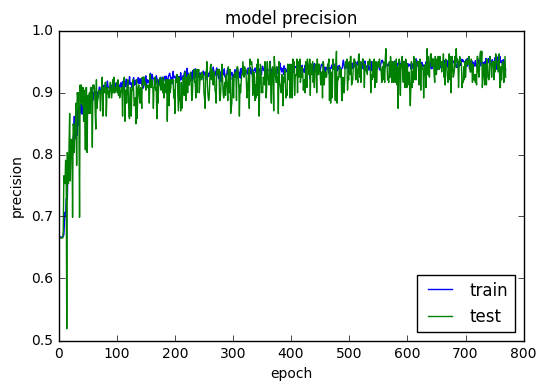

Continuation of training with no pre-processing:


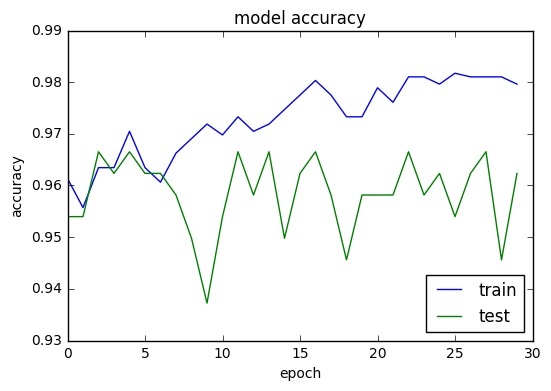

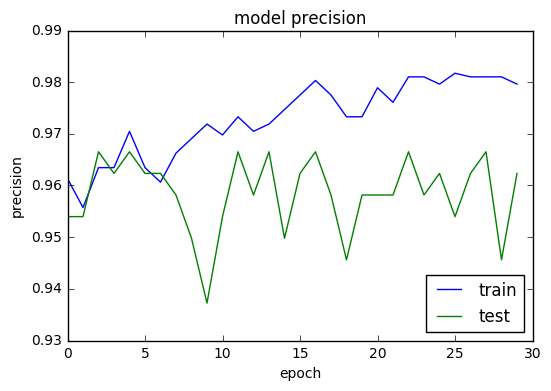

X shape: (239, 34, 56, 1)
239 samples
Evaluating ensemble
224/239 [===========================>..] - ETA: 0sTest accuracy: 97.0711301061 %
Test error: 2.92887026795 %
224/239 [===========================>..] - ETA: 0s
Example of correct predictions for char: B


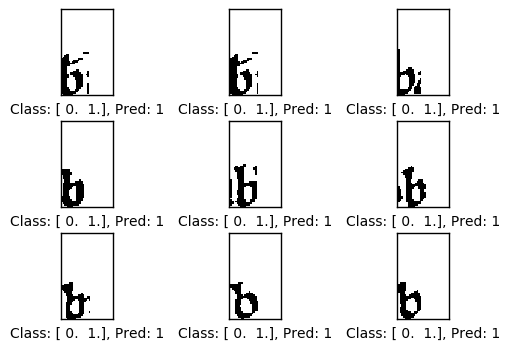


Example of incorrect predictions for char: B

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[154   5]
 [  2  78]]


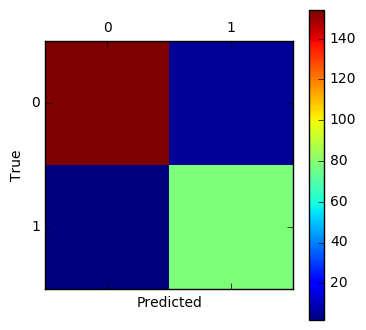


---- END ANALISYS FOR CHAR B ----

Trovati 140 esempi positivi per il carattere F .
Campioni di training: 120 	Campioni di test: 20
Richiesti 280 esempi negativi: trovati 280 generici.
Numero totale di campioni di training: 360
Numero totale di campioni di test: 60

---- START ANALISYS FOR CHAR F ----

Start TRAINING for char F
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 21 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 19 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 10 epoch(s)
Done.



The TRAINING lasted 310.13 seconds
History: 


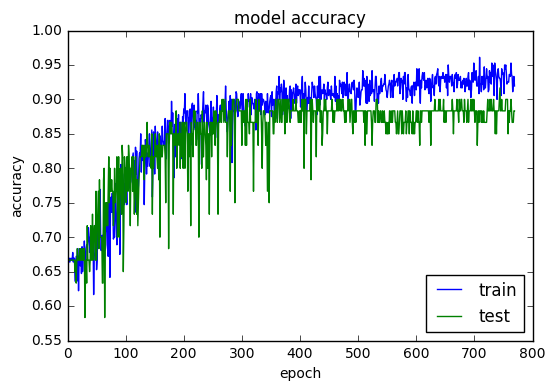

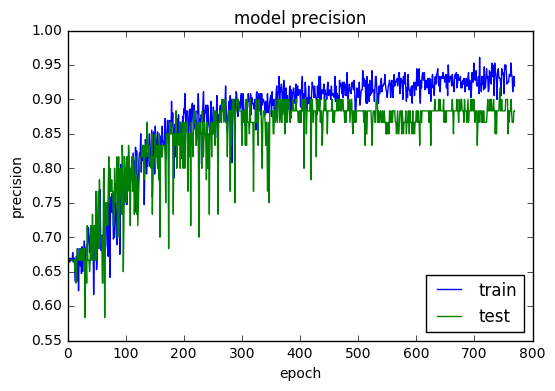

Continuation of training with no pre-processing:


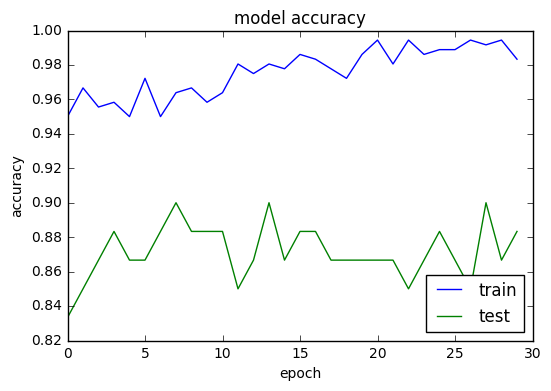

X shape: (60, 34, 56, 1)
60 samples
Evaluating ensemble
60/60 [==============================] - 2s     
Test accuracy: 91.6666682561 %
Test error: 8.33333452543 %
32/60 [===============>..............] - ETA: 1s
Example of correct predictions for char: F


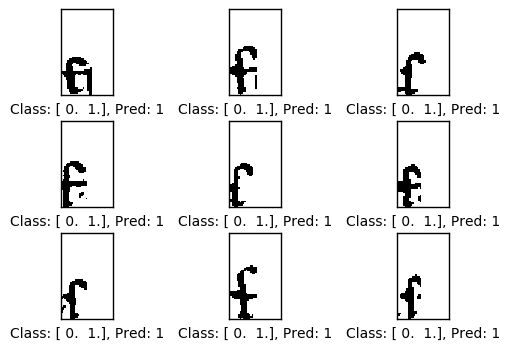


Example of incorrect predictions for char: F

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[37  3]
 [ 2 18]]



---- END ANALISYS FOR CHAR F ----

Trovati 123 esempi positivi per il carattere H .
Campioni di training: 105 	Campioni di test: 18
Richiesti 246 esempi negativi: trovati 246 generici.
Numero totale di campioni di training: 315
Numero totale di campioni di test: 54

---- START ANALISYS FOR CHAR H ----

Start TRAINING for char H
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 36 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 29 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 10 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 13 epoch(s)
Done.



The TRAINING lasted 286.52 seconds
History: 


Continuation of training with no pre-processing:


X shape: (54, 34, 56, 1)
54 samples
Evaluating ensemble
54/54 [==============================] - 2s     
Test accuracy: 85.1851856267 %
Test error: 14.8148143733 %
32/54 [================>.............] - ETA: 1s
Example of correct predictions for char: H



Example of incorrect predictions for char: H

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[33  3]
 [ 5 13]]


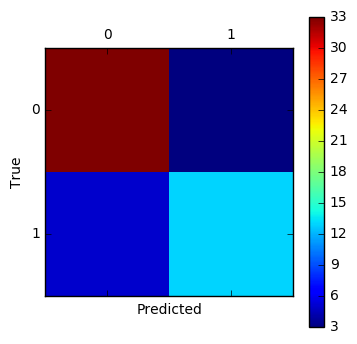


---- END ANALISYS FOR CHAR H ----

Trovati 390 esempi positivi per il carattere L .
Campioni di training: 334 	Campioni di test: 56
Richiesti 780 esempi negativi: trovati 780 generici.
Numero totale di campioni di training: 1002
Numero totale di campioni di test: 168

---- START ANALISYS FOR CHAR L ----

Start TRAINING for char L
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 36 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 27 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 13 epoch(s)
Done.



The TRAINING lasted 819.00 seconds
History: 


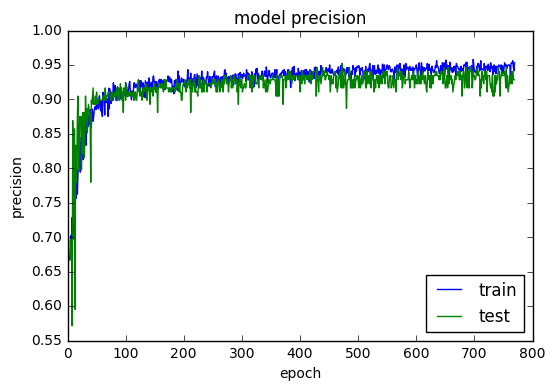

Continuation of training with no pre-processing:


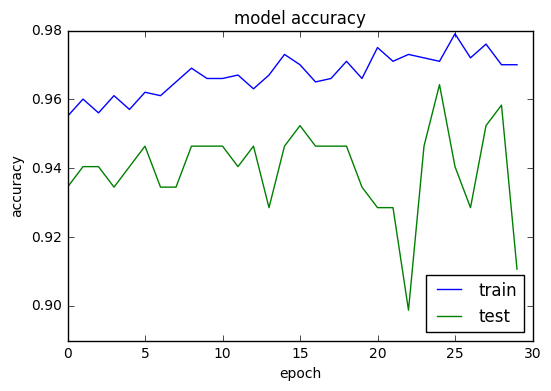

X shape: (168, 34, 56, 1)
168 samples
Evaluating ensemble
168/168 [==============================] - 2s     
Test accuracy: 95.2380952381 %
Test error: 4.7619047619 %
160/168 [===========================>..] - ETA: 0s
Example of correct predictions for char: L


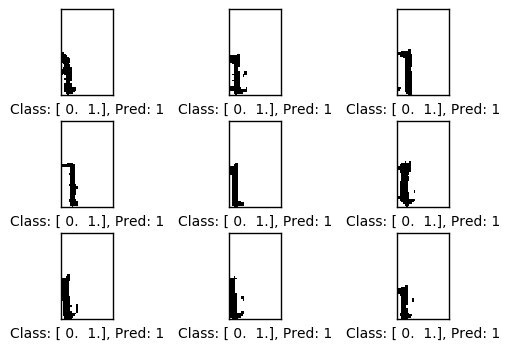


Example of incorrect predictions for char: L

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[107   5]
 [  3  53]]


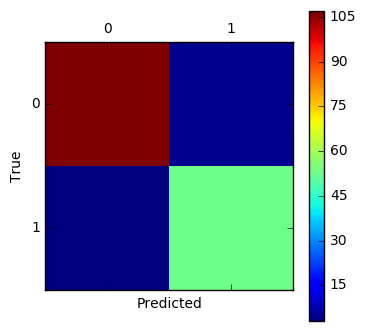


---- END ANALISYS FOR CHAR L ----

Trovati 347 esempi positivi per il carattere G .
Campioni di training: 297 	Campioni di test: 50
Richiesti 694 esempi negativi: trovati 694 generici.
Numero totale di campioni di training: 891
Numero totale di campioni di test: 150

---- START ANALISYS FOR CHAR G ----

Start TRAINING for char G
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 13 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 18 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 16 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 13 epoch(s)
Done.



The TRAINING lasted 737.52 seconds
History: 


Continuation of training with no pre-processing:


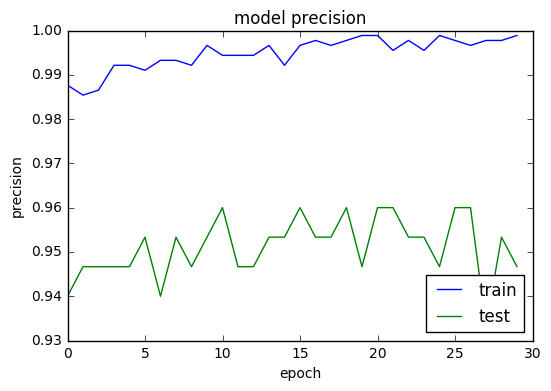

X shape: (150, 34, 56, 1)
150 samples
Evaluating ensemble
150/150 [==============================] - 2s     
Test accuracy: 93.3333333333 %
Test error: 6.66666666667 %
150/150 [==============================] - 2s     

Example of correct predictions for char: G



Example of incorrect predictions for char: G


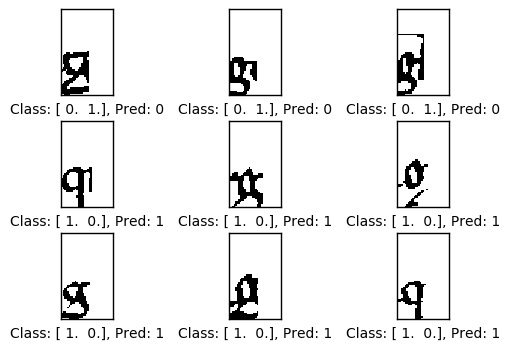

[[93  7]
 [ 3 47]]


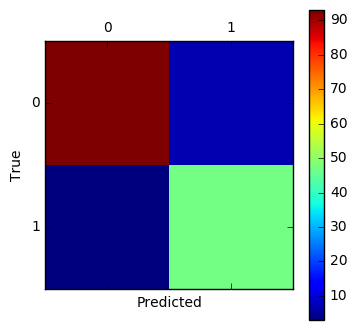


---- END ANALISYS FOR CHAR G ----

Trovati 1255 esempi positivi per il carattere P .
Campioni di training: 1075 	Campioni di test: 180
Richiesti 2510 esempi negativi: trovati 2510 generici.
Numero totale di campioni di training: 3226
Numero totale di campioni di test: 539

---- START ANALISYS FOR CHAR P ----

Start TRAINING for char P
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 24 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 34 epoch(s)
Done.



The TRAINING lasted 2694.16 seconds
History: 


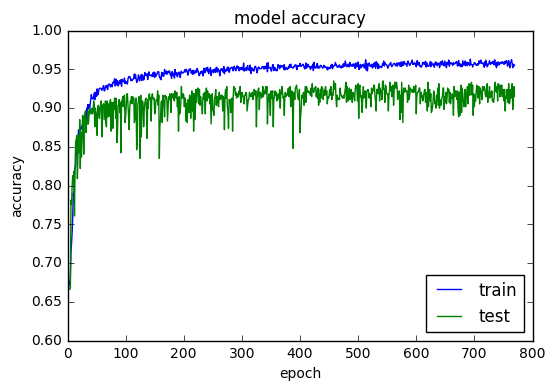

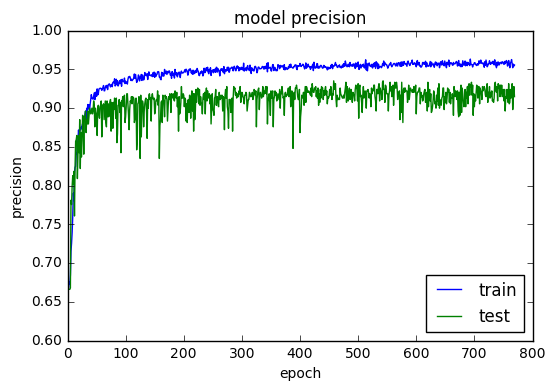

Continuation of training with no pre-processing:


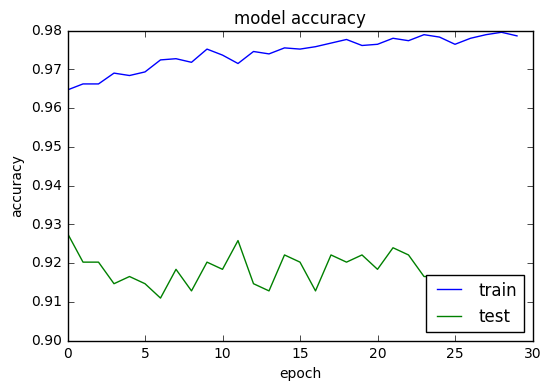

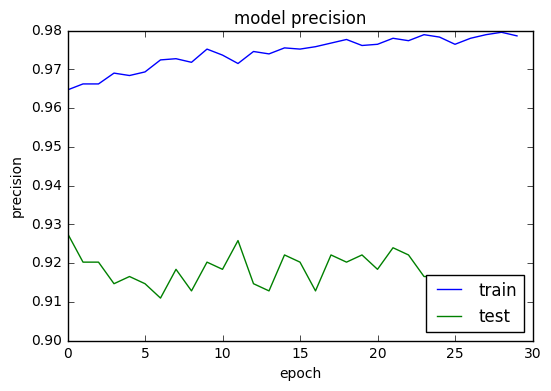

X shape: (539, 34, 56, 1)
539 samples
Evaluating ensemble
539/539 [==============================] - 2s     
Test accuracy: 93.877551131 %
Test error: 6.12244886901 %
512/539 [===========================>..] - ETA: 0s
Example of correct predictions for char: P


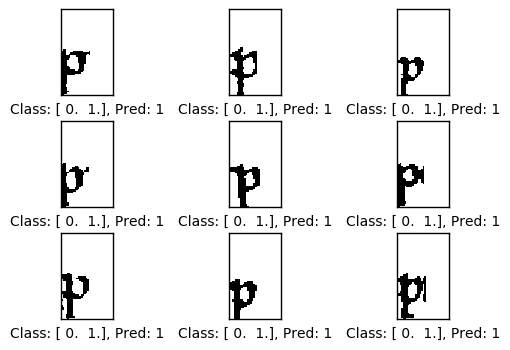


Example of incorrect predictions for char: P


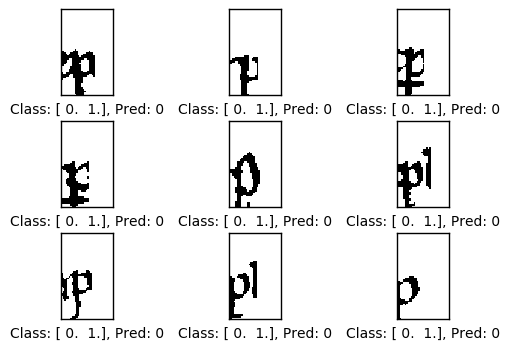

[[335  24]
 [  9 171]]


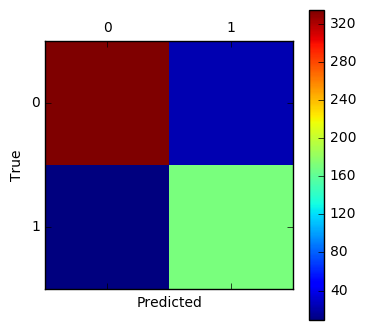


---- END ANALISYS FOR CHAR P ----

Trovati 460 esempi positivi per il carattere Q .
Campioni di training: 394 	Campioni di test: 66
Richiesti 920 esempi negativi: trovati 920 generici.
Numero totale di campioni di training: 1182
Numero totale di campioni di test: 198

---- START ANALISYS FOR CHAR Q ----

Start TRAINING for char Q
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 31 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 25 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 11 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 47 epoch(s)
Done.



The TRAINING lasted 1031.91 seconds
History: 


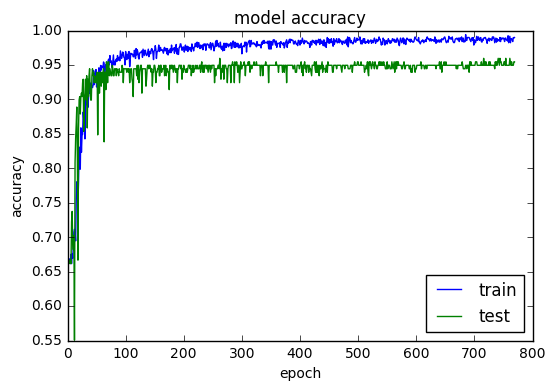

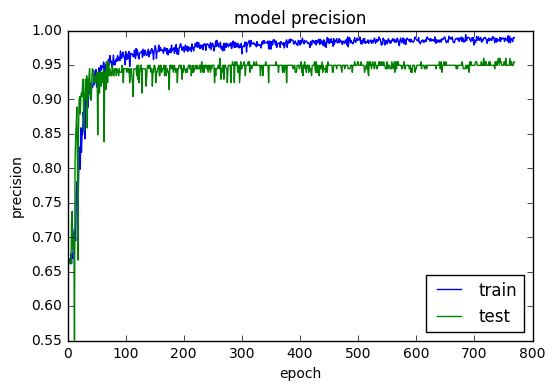

Continuation of training with no pre-processing:


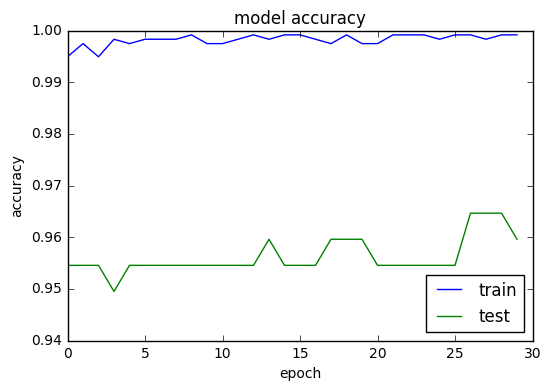

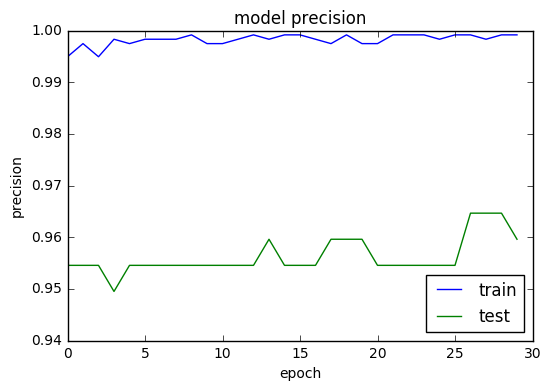

X shape: (198, 34, 56, 1)
198 samples
Evaluating ensemble
192/198 [============================>.] - ETA: 0sTest accuracy: 96.4646464646 %
Test error: 3.53535353535 %
192/198 [============================>.] - ETA: 0s
Example of correct predictions for char: Q


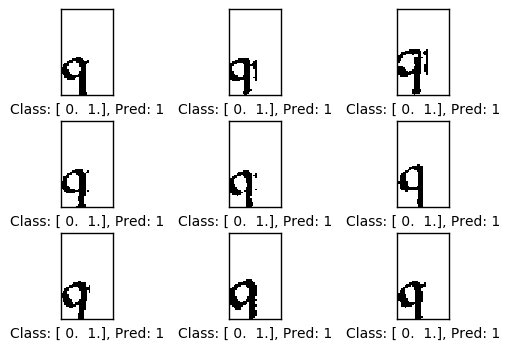


Example of incorrect predictions for char: Q

I cannot plot the graph because there less than 9 points or because the dimension of images and cls_true mismatch
[[131   1]
 [  6  60]]


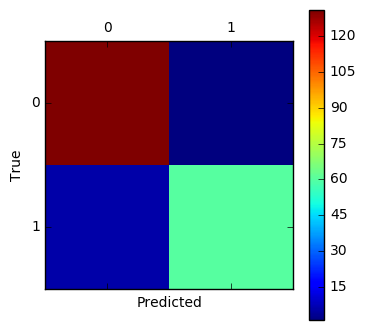


---- END ANALISYS FOR CHAR Q ----

Trovati 335 esempi positivi per il carattere S_BASSA .
Campioni di training: 287 	Campioni di test: 48
Richiesti 670 esempi negativi: trovati 670 generici.
Numero totale di campioni di training: 861
Numero totale di campioni di test: 144

---- START ANALISYS FOR CHAR S_BASSA ----

Start TRAINING for char S_BASSA
Training model 0 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 30 epoch(s)
Training model 1 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 23 epoch(s)
Training model 2 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 22 epoch(s)
Training model 3 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 49 epoch(s)
Training model 4 ...
Older Nerual Net could not be found, creating a new net...
Not pre-processing 38 epoch(s)
Done.



The TRAINING lasted 710.60 seconds
History: 


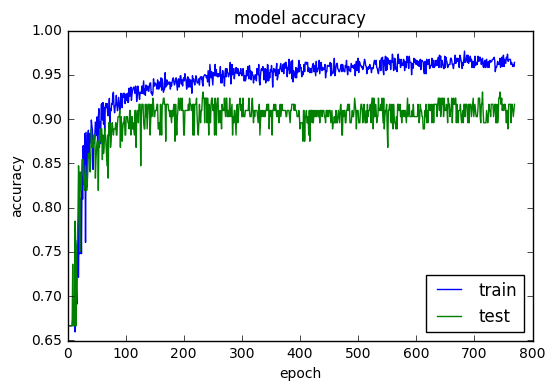

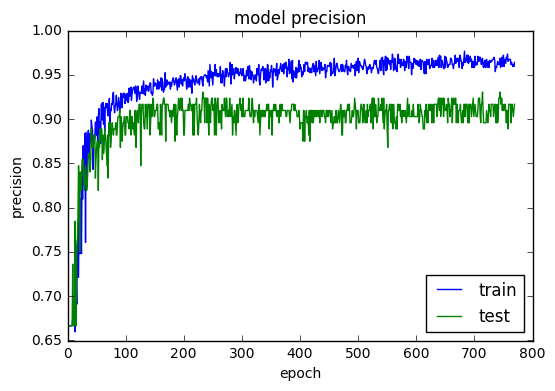

Continuation of training with no pre-processing:


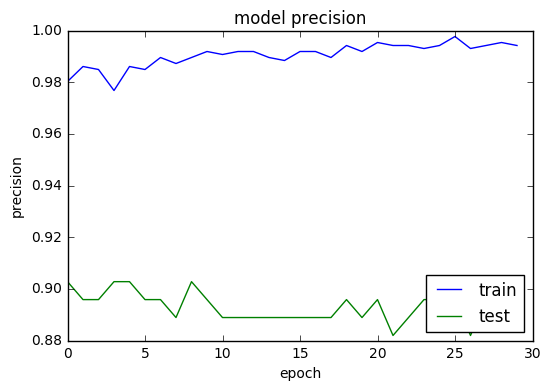

X shape: (144, 34, 56, 1)
144 samples
Evaluating ensemble
128/144 [=========================>....] - ETA: 0sTest accuracy: 91.6666666667 %
Test error: 8.33333333333 %
128/144 [=========================>....] - ETA: 0s
Example of correct predictions for char: S_BASSA


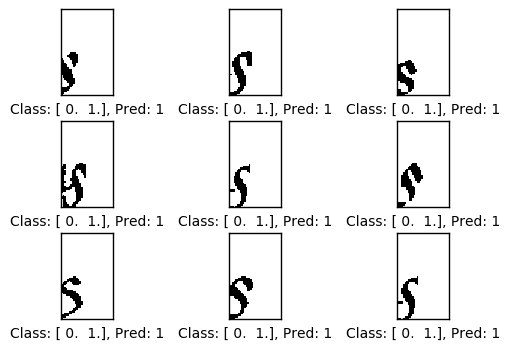


Example of incorrect predictions for char: S_BASSA


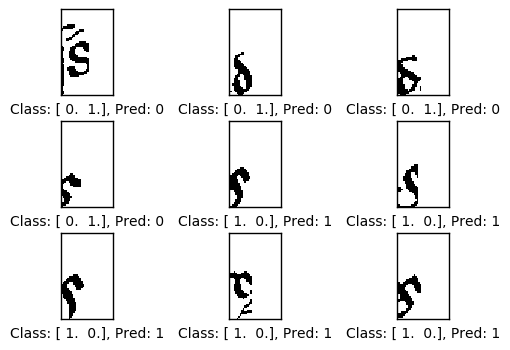

[[88  8]
 [ 4 44]]


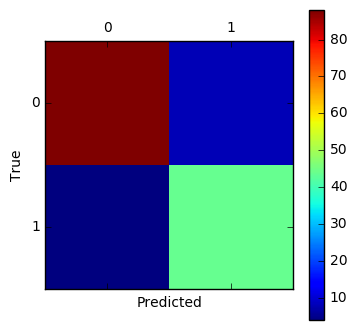


---- END ANALISYS FOR CHAR S_BASSA ----



In [5]:
analyze_all_letters(directories2, pos_neg_ratio=2, clamp_end_path=1)